### 데이터사이언스융합학과 2024710658 박창준

# Google Colab amount

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### 패키치 설치 및 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

C:\Dev\miniconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


데이터 출처 : https://dacon.io/competitions/official/235713/data

### 변수 설명
- index : index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
        ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
        ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
        ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
        ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### Data Load

In [3]:
df = pd.read_csv("D:/박창준 문서/4. 대학교육/2. 성균관대학교 일반대학원/Code/Credit_Card_Members.csv")

In [4]:
# 2진분류로 변경
df['credit'] = np.where(df['credit'] == 2, 1, 0)

In [5]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['credit'])  # 종속 변수를 제외한 모든 독립 변수들
y = df['credit']  # 종속 변수

# train과 test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle = True)

In [6]:
train = pd.concat([X_train, y_train], axis=1)
# 인덱스를 다시 설정
train.reset_index(drop=True, inplace=True)

In [7]:
test = pd.concat([X_test, y_test], axis=1)
# 인덱스를 다시 설정
test.reset_index(drop=True, inplace=True)

In [8]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,10955,F,N,N,2,202500.0,Working,Secondary / secondary special,Married,House / apartment,-13446,-2720,1,0,0,0,Sales staff,4.0,-31.0,1
1,9607,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,-21523,365243,1,0,1,0,NaN,2.0,-36.0,1
2,10066,F,N,Y,2,126000.0,Working,Secondary / secondary special,Married,House / apartment,-10020,-1587,1,1,1,0,Sales staff,4.0,-1.0,0
3,2000,F,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-20493,-7624,1,1,1,0,Managers,2.0,-52.0,0
4,5160,M,N,Y,0,391500.0,Working,Secondary / secondary special,Separated,House / apartment,-17522,-1526,1,0,0,0,Security staff,1.0,-55.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,3546,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,Office apartment,-19760,-2099,1,0,0,0,Cleaning staff,2.0,-53.0,0
21161,3698,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,1,0,0,0,Laborers,3.0,-7.0,1
21162,17494,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21349,365243,1,0,0,0,NaN,1.0,-40.0,1
21163,1719,F,Y,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-17052,-3055,1,0,0,0,Sales staff,2.0,-21.0,1


In [9]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,342,F,Y,Y,4,112500.0,Working,Higher education,Married,House / apartment,-13671,-1974,1,0,0,0,Core staff,6.0,-12.0,0
1,12310,F,Y,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13590,-982,1,0,1,0,NaN,2.0,-15.0,1
2,19218,F,N,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-18401,-2149,1,0,0,0,Laborers,2.0,-10.0,1
3,3470,F,Y,Y,1,211500.0,Pensioner,Higher education,Married,House / apartment,-10985,365243,1,0,0,0,NaN,3.0,-15.0,0
4,16018,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22362,365243,1,0,0,0,NaN,1.0,-10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,5371,F,N,Y,0,45000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22783,365243,1,0,1,0,NaN,2.0,-42.0,0
5288,25799,M,N,N,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15774,-2347,1,1,0,0,NaN,3.0,-21.0,1
5289,14985,F,Y,Y,0,135000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-13114,-1812,1,0,0,1,Medicine staff,2.0,-40.0,0
5290,7592,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,Office apartment,-19002,-704,1,0,1,0,NaN,2.0,-20.0,1


### EDA & Preprocessing

1) 개형 확인

In [10]:
train.shape

(21165, 20)

In [11]:
test.shape

(5292, 20)

2) 컬럼별 자료형 확인

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21165 non-null  int64  
 1   gender         21165 non-null  object 
 2   car            21165 non-null  object 
 3   reality        21165 non-null  object 
 4   child_num      21165 non-null  int64  
 5   income_total   21165 non-null  float64
 6   income_type    21165 non-null  object 
 7   edu_type       21165 non-null  object 
 8   family_type    21165 non-null  object 
 9   house_type     21165 non-null  object 
 10  DAYS_BIRTH     21165 non-null  int64  
 11  DAYS_EMPLOYED  21165 non-null  int64  
 12  FLAG_MOBIL     21165 non-null  int64  
 13  work_phone     21165 non-null  int64  
 14  phone          21165 non-null  int64  
 15  email          21165 non-null  int64  
 16  occyp_type     14592 non-null  object 
 17  family_size    21165 non-null  float64
 18  begin_

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5292 non-null   int64  
 1   gender         5292 non-null   object 
 2   car            5292 non-null   object 
 3   reality        5292 non-null   object 
 4   child_num      5292 non-null   int64  
 5   income_total   5292 non-null   float64
 6   income_type    5292 non-null   object 
 7   edu_type       5292 non-null   object 
 8   family_type    5292 non-null   object 
 9   house_type     5292 non-null   object 
 10  DAYS_BIRTH     5292 non-null   int64  
 11  DAYS_EMPLOYED  5292 non-null   int64  
 12  FLAG_MOBIL     5292 non-null   int64  
 13  work_phone     5292 non-null   int64  
 14  phone          5292 non-null   int64  
 15  email          5292 non-null   int64  
 16  occyp_type     3694 non-null   object 
 17  family_size    5292 non-null   float64
 18  begin_mo

3) target (credit 컬럼) 확인

In [14]:
train['credit'].value_counts()

credit
1    13574
0     7591
Name: count, dtype: int64

In [15]:
train['credit'].value_counts(normalize=True)

credit
1    0.641342
0    0.358658
Name: proportion, dtype: float64

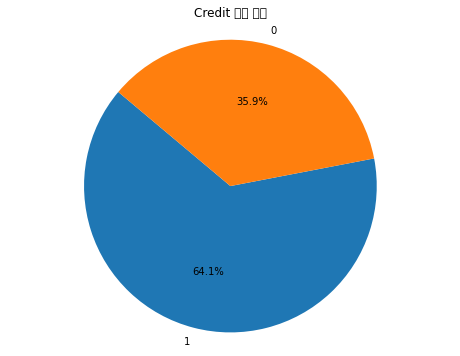

In [16]:
import matplotlib.pyplot as plt

# credit 컬럼의 값 빈도 계산
credit_counts = train['credit'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
plt.pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit 구성 비율')
plt.axis('equal')  # 원 그래프를 동그랗게 만듦
plt.show()

4)  Numeric column, Categorical column 나누기

In [17]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [18]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [19]:
print(numerical_list)
print(categorical_list)

['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) 컬럼별 이상치분석

- Numerical Data

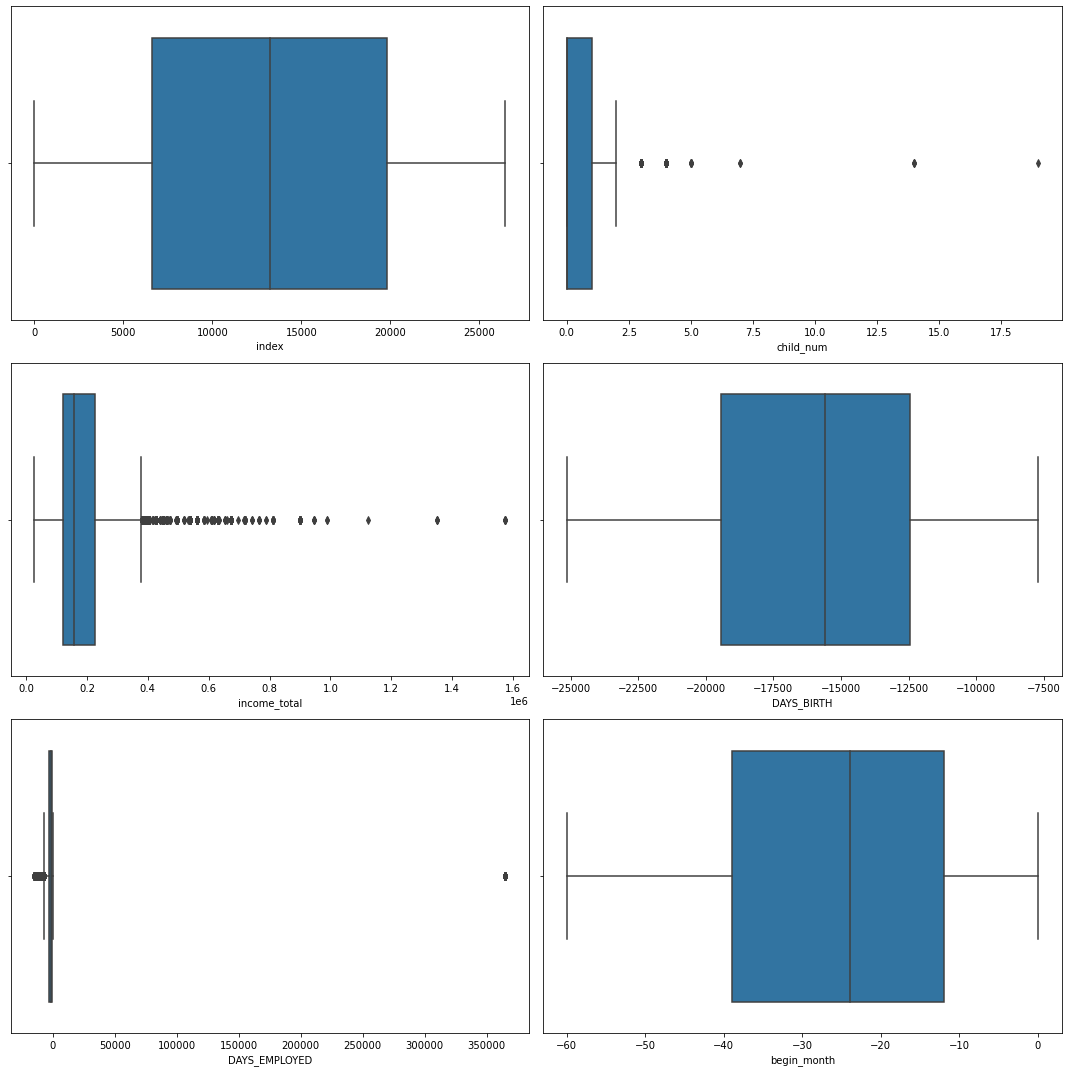

In [20]:
def visualize_outliers_iqr(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols // 2, 2, figsize=(15, 15))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        Q1 = df[columns[i]].quantile(0.25)  # 수정 필요: df[col] -> df[columns[i]]
        Q3 = df[columns[i]].quantile(0.75)  # 수정 필요: df[col] -> df[columns[i]]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[((df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound))]
        sns.boxplot(x=df[columns[i]], ax=axes[row, col])
    plt.tight_layout()
    plt.show()

# 이상치 분석 및 시각화
visualize_outliers_iqr(train, numerical_list)

    (4-1) child_num >= 7인 경우 모두 credit = 2 를 보여줌

In [21]:
train[train['child_num'] >= 7][['child_num', 'credit']]

,child_num,credit
2689,7,1
4989,14,1
5977,14,1
11340,7,1
11377,14,1
16245,19,1


    (4-1) child_num >= 7인 경우 제거

In [22]:
train = train[train['child_num'] < 8]

In [23]:
train[train['child_num'] > 7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 train 4,438개이며, 이때의 occyp_type은 전부 'NaN'

In [24]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type', 'credit']]

,DAYS_EMPLOYED,occyp_type,credit
1,365243,NaN,1
7,365243,NaN,0
15,365243,NaN,1
16,365243,NaN,1
20,365243,NaN,0
...,...,...,...
21133,365243,NaN,1
21138,365243,NaN,1
21149,365243,NaN,1
21162,365243,NaN,1


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 df에서는 6,135개

In [25]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type']]

,DAYS_EMPLOYED,occyp_type
1,365243,NaN
7,365243,NaN
15,365243,NaN
16,365243,NaN
20,365243,NaN
...,...,...
21133,365243,NaN
21138,365243,NaN
21149,365243,NaN
21162,365243,NaN


    (4-2) 365243일이면 연으로 환산시 1,000년이 넘으므로, 잘못된 값으로 판단.
          DAYS_EMPLOYED == 365243인 컬럼 모두 0으로 변환

In [26]:
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

In [27]:
train.loc[train['DAYS_EMPLOYED'] == 0, 'DAYS_EMPLOYED']

1        0
7        0
15       0
16       0
20       0
        ..
21133    0
21138    0
21149    0
21162    0
21164    0
Name: DAYS_EMPLOYED, Length: 3590, dtype: int64

- Categorical Data

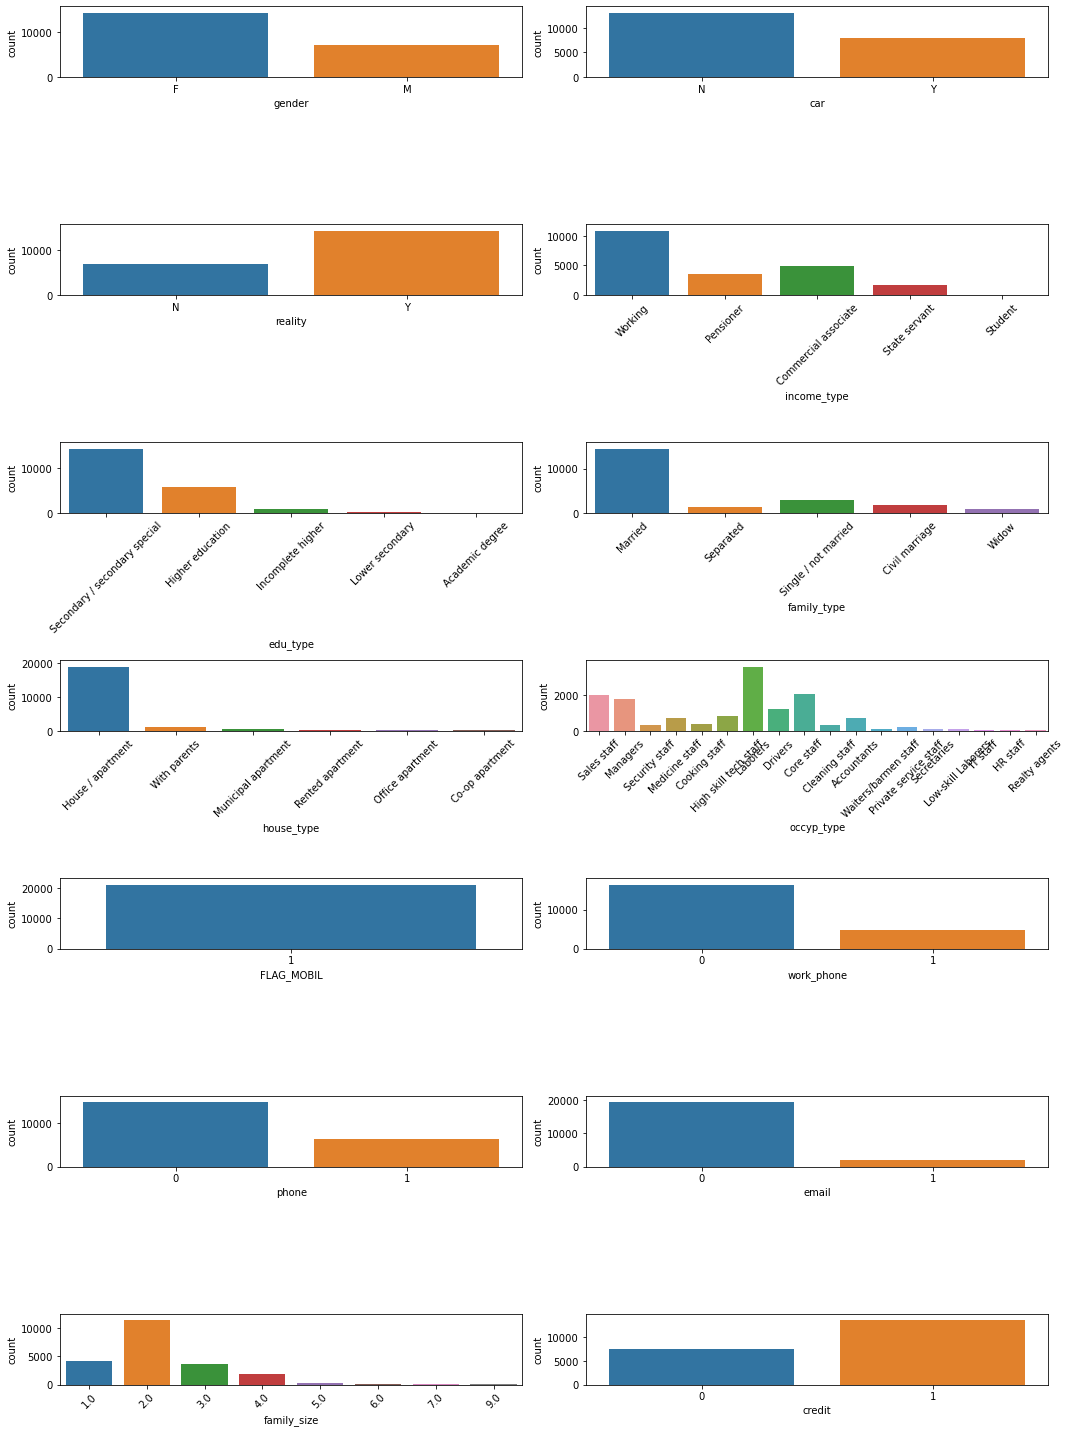

In [28]:
def visualize_categorical(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots((num_cols + 1) // 2, 2, figsize=(15, 20))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        sns.countplot(x=columns[i], data=df, ax=axes[row, col])
        if len(df[columns[i]].unique()) >= 4:
            axes[row, col].tick_params(axis='x', rotation=45)  # x축 눈금 레이블 45도 회전
        axes[row, col].set_ylim(0, df[columns[i]].value_counts().max() * 1.1)  # y축 늘리기
    plt.tight_layout()
    plt.show()

# 카테고리컬 변수 시각화
visualize_categorical(train, categorical_list)

    (4-3) family_size >= 7인 경우 모두 credit = 2 를 보여줌

In [29]:
train[train['family_size'] > 7][['family_size', 'credit']]

,family_size,credit
2689,9.0,1
11340,9.0,1


    (4-3) family_size > 7인 경우 전부 제거

In [30]:
train = train[train['family_size'] < 8]

In [31]:
train[train['family_size'] >= 8]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


5) 데이터 정확성 확인

In [32]:
train['age'] = (train['DAYS_BIRTH'] * -1) // 365
test['age'] = (test['DAYS_BIRTH'] * -1) // 365

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21159 entries, 0 to 21164
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21159 non-null  int64  
 1   gender         21159 non-null  object 
 2   car            21159 non-null  object 
 3   reality        21159 non-null  object 
 4   child_num      21159 non-null  int64  
 5   income_total   21159 non-null  float64
 6   income_type    21159 non-null  object 
 7   edu_type       21159 non-null  object 
 8   family_type    21159 non-null  object 
 9   house_type     21159 non-null  object 
 10  DAYS_BIRTH     21159 non-null  int64  
 11  DAYS_EMPLOYED  21159 non-null  int64  
 12  FLAG_MOBIL     21159 non-null  int64  
 13  work_phone     21159 non-null  int64  
 14  phone          21159 non-null  int64  
 15  email          21159 non-null  int64  
 16  occyp_type     14586 non-null  object 
 17  family_size    21159 non-null  float64
 18  begin_month

    (5-1) 퇴직할 나이가 아닌데도 불구하고 연급 수령을 받는사람 조회

In [34]:
train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 60)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
1,9607,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-36.0,1,58
36,15394,F,N,N,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-14.0,1,58
53,6437,F,N,Y,0,270000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-7.0,1,59
66,15024,F,N,Y,0,202500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-51.0,1,59
115,24401,F,N,N,1,54000.0,Pensioner,Lower secondary,Married,House / apartment,...,0,1,0,0,0,NaN,3.0,-17.0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,22212,F,N,Y,0,126000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-13.0,0,59
21131,23774,F,N,Y,0,148500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-11.0,1,58
21132,8073,F,Y,N,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-22.0,1,57
21149,22803,F,Y,Y,0,67500.0,Pensioner,Incomplete higher,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-17.0,1,58


    (5-2) 31세 미만의 Pensioner(연급수급자)는 이상치로 분류하여 삭제

In [35]:
train = train.drop(train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 31)].index)

In [36]:
# test = test.drop(test[(test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()) & (test['age'] < 31)].index)

In [37]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,10955,F,N,N,2,202500.0,Working,Secondary / secondary special,Married,House / apartment,...,-2720,1,0,0,0,Sales staff,4.0,-31.0,1,36
1,9607,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-36.0,1,58
2,10066,F,N,Y,2,126000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1587,1,1,1,0,Sales staff,4.0,-1.0,0,27
3,2000,F,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-7624,1,1,1,0,Managers,2.0,-52.0,0,56
4,5160,M,N,Y,0,391500.0,Working,Secondary / secondary special,Separated,House / apartment,...,-1526,1,0,0,0,Security staff,1.0,-55.0,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,3546,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,Office apartment,...,-2099,1,0,0,0,Cleaning staff,2.0,-53.0,0,54
21161,3698,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-4019,1,0,0,0,Laborers,3.0,-7.0,1,31
21162,17494,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-40.0,1,58
21163,1719,F,Y,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-3055,1,0,0,0,Sales staff,2.0,-21.0,1,46


    (5-3) 31세 이상 ~ 60세 미만의 연급수급자는 income_type을 Pensioner_Special로 변경

In [38]:
train.loc[(train['age'] >= 31) & (train['age'] < 60) & (train['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

In [39]:
test.loc[(test['age'] >= 31) & (test['age'] < 60) & (test['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

    (5-4) child_num > 0 이면서 family_type == 'Single / not married인 경우를 확인

In [40]:
train[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
14,14617,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-604,1,0,0,0,Laborers,2.0,-8.0,1,31
128,19778,F,N,Y,1,121500.0,Working,Incomplete higher,Single / not married,House / apartment,...,-1621,1,0,0,0,NaN,2.0,-43.0,1,37
143,24984,F,N,N,1,171261.0,State servant,Secondary / secondary special,Single / not married,Rented apartment,...,-493,1,0,0,0,Medicine staff,2.0,-29.0,1,26
180,18445,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-6.0,1,27
245,14520,F,N,Y,1,216000.0,Working,Higher education,Single / not married,House / apartment,...,-1782,1,0,1,0,Core staff,2.0,-10.0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,1550,F,Y,Y,1,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-949,1,0,0,0,Laborers,2.0,-46.0,1,37
21022,11625,F,N,Y,3,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-5072,1,0,0,0,Laborers,4.0,-7.0,0,32
21059,7993,F,N,Y,1,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-504,1,0,0,0,Core staff,2.0,-39.0,1,39
21090,9222,F,N,Y,1,225000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-138,1,0,0,0,Sales staff,2.0,-17.0,1,32


    (5-5) 미혼모, 입양 등의 경우가 있을 수 있으므로 family type을 'Adopt'으로 설정

In [41]:
train.loc[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0), 'family_type'] = 'Adopt'

In [42]:
test.loc[(test['family_type'] == 'Single / not married') & (test['child_num'] > 0), 'family_type'] = 'Adopt'

In [43]:
train[train['family_type']== 'Adopt']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
14,14617,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-604,1,0,0,0,Laborers,2.0,-8.0,1,31
128,19778,F,N,Y,1,121500.0,Working,Incomplete higher,Adopt,House / apartment,...,-1621,1,0,0,0,NaN,2.0,-43.0,1,37
143,24984,F,N,N,1,171261.0,State servant,Secondary / secondary special,Adopt,Rented apartment,...,-493,1,0,0,0,Medicine staff,2.0,-29.0,1,26
180,18445,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Adopt,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-6.0,1,27
245,14520,F,N,Y,1,216000.0,Working,Higher education,Adopt,House / apartment,...,-1782,1,0,1,0,Core staff,2.0,-10.0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,1550,F,Y,Y,1,135000.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-949,1,0,0,0,Laborers,2.0,-46.0,1,37
21022,11625,F,N,Y,3,225000.0,Commercial associate,Secondary / secondary special,Adopt,House / apartment,...,-5072,1,0,0,0,Laborers,4.0,-7.0,0,32
21059,7993,F,N,Y,1,225000.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-504,1,0,0,0,Core staff,2.0,-39.0,1,39
21090,9222,F,N,Y,1,225000.0,Commercial associate,Higher education,Adopt,House / apartment,...,-138,1,0,0,0,Sales staff,2.0,-17.0,1,32


6) 결측치 확인 및 처리

In [44]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       6559
family_size         0
begin_month         0
credit              0
age                 0
dtype: int64

In [45]:
train_null = pd.DataFrame(train.isnull().sum(), columns=['null'])
train_null['null_ratio'] = train_null['null'] / len(train)
train_null.sort_values(by = ['null_ratio'], ascending = False)

,null,null_ratio
occyp_type,6559,0.310192
index,0,0.000000
DAYS_EMPLOYED,0,0.000000
credit,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000


    (6-1) age >= 60 이면서 income_type == 'Pensioner' 이면서 occyp_type == Nan인 경우,
          노후걱정 없는 은퇴자로 판단하여, 'Retired_Pensioner'로 대체

In [46]:
train[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
7,5118,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,NaN,1.0,-23.0,0,64
15,7583,F,N,N,0,108000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-45.0,1,60
16,22881,F,N,Y,0,180000.0,Pensioner,Higher education,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-56.0,1,65
20,23717,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-3.0,0,64
38,23644,F,N,N,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-23.0,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21128,8141,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-14.0,1,64
21129,18320,M,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-49.0,0,61
21133,20826,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-25.0,1,62
21138,15315,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-11.0,1,60


In [47]:
test[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
4,16018,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-10.0,1,61
15,14382,F,Y,Y,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-10.0,1,60
23,16115,F,N,Y,0,103500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-28.0,0,65
50,11916,F,Y,N,0,153000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-35.0,0,64
63,8480,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,1,NaN,2.0,-47.0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,17211,F,Y,Y,0,450000.0,Pensioner,Higher education,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-17.0,1,60
5231,2646,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-7.0,1,61
5251,24828,F,Y,Y,0,225000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-24.0,0,64
5273,6312,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-37.0,1,67


In [48]:
train.loc[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'
test.loc[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'

    (6-2) age >= 60이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
          퇴직하지 않고 일하고 있는 그룹으로 'Not_retired'으로 대체

In [49]:
train[(train['age']>=60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type', 'credit']]

,age,income_total,income_type,occyp_type,credit
186,60,202500.0,State servant,NaN,1
203,60,202500.0,State servant,NaN,1
666,64,261000.0,Working,NaN,1
861,61,166500.0,Working,NaN,1
1109,64,112500.0,Working,NaN,0
...,...,...,...,...,...
20596,60,202500.0,State servant,NaN,0
20646,60,225000.0,Working,NaN,0
20696,60,405000.0,Commercial associate,NaN,1
21003,62,270000.0,Commercial associate,NaN,1


In [50]:
test[(test['age']>=60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type']]

,age,income_total,income_type,occyp_type
25,65,112500.0,Commercial associate,NaN
213,62,450000.0,State servant,NaN
283,64,112500.0,Working,NaN
512,64,112500.0,Working,NaN
630,60,247500.0,Working,NaN
646,63,247500.0,Commercial associate,NaN
1321,63,247500.0,Commercial associate,NaN
1536,60,99000.0,Working,NaN
2095,60,99000.0,Working,NaN
2283,60,99000.0,Working,NaN


In [51]:
train.loc[(train['age'] >= 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'
test.loc[(test['age'] >= 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'

In [52]:
train[train['occyp_type'] == 'Not_retired']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
186,16368,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-39.0,1,60
203,8774,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-37.0,1,60
666,24329,F,N,N,0,261000.0,Working,Higher education,Separated,House / apartment,...,-9989,1,0,1,0,Not_retired,1.0,-43.0,1,64
861,22205,F,N,N,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,...,-5467,1,0,1,0,Not_retired,2.0,-58.0,1,61
1109,2437,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-469,1,0,0,0,Not_retired,2.0,-22.0,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20596,2150,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-46.0,0,60
20646,25272,F,N,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1986,1,0,0,0,Not_retired,2.0,-3.0,0,60
20696,16044,F,N,Y,0,405000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-9046,1,0,1,0,Not_retired,2.0,-27.0,1,60
21003,23093,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-3613,1,0,0,0,Not_retired,2.0,-11.0,1,62


    (6-3) 'age' < 60 이면서 DAYS_EMPLOYED == 0 이면서, occyp_type == Nan인 경우,
           일을 하지 않는 그룹으로'unemployed'로 대체

In [53]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
1,9607,F,N,Y,0,135000.0,Pensioner_Special,Higher education,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-36.0,1,58
36,15394,F,N,N,0,67500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-14.0,1,58
53,6437,F,N,Y,0,270000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-7.0,1,59
66,15024,F,N,Y,0,202500.0,Pensioner_Special,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-51.0,1,59
115,24401,F,N,N,1,54000.0,Pensioner_Special,Lower secondary,Married,House / apartment,...,0,1,0,0,0,NaN,3.0,-17.0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,22212,F,N,Y,0,126000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-13.0,0,59
21131,23774,F,N,Y,0,148500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-11.0,1,58
21132,8073,F,Y,N,0,157500.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-22.0,1,57
21149,22803,F,Y,Y,0,67500.0,Pensioner_Special,Incomplete higher,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-17.0,1,58


In [54]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age


In [55]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'unemployed'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'unemployed'

In [56]:
train[train['occyp_type'] == 'unemployed']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
1,9607,F,N,Y,0,135000.0,Pensioner_Special,Higher education,Married,House / apartment,...,0,1,0,1,0,unemployed,2.0,-36.0,1,58
36,15394,F,N,N,0,67500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-14.0,1,58
53,6437,F,N,Y,0,270000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,unemployed,1.0,-7.0,1,59
66,15024,F,N,Y,0,202500.0,Pensioner_Special,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,unemployed,1.0,-51.0,1,59
115,24401,F,N,N,1,54000.0,Pensioner_Special,Lower secondary,Married,House / apartment,...,0,1,0,0,0,unemployed,3.0,-17.0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,22212,F,N,Y,0,126000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,unemployed,1.0,-13.0,0,59
21131,23774,F,N,Y,0,148500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-11.0,1,58
21132,8073,F,Y,N,0,157500.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,unemployed,1.0,-22.0,1,57
21149,22803,F,Y,Y,0,67500.0,Pensioner_Special,Incomplete higher,Married,House / apartment,...,0,1,0,1,0,unemployed,2.0,-17.0,1,58


    (6-4) 'age' < 60 이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
           일을 여전히 하고 있는 그룹이나, 직업을 특정하기 어려워 새로운 클래스인 'Worekrs'로 대체

In [57]:
train.groupby('edu_type')['occyp_type'].apply(lambda x: x.value_counts())

edu_type                                    
Academic degree                Not_retired         4
                               Sales staff         4
                               Managers            2
                               unemployed          1
Higher education               Managers         1007
                                                ... 
Secondary / secondary special  Realty agents      52
                               Not_retired        45
                               Secretaries        32
                               HR staff           25
                               IT staff            9
Name: occyp_type, Length: 77, dtype: int64

In [58]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
5,6031,F,Y,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-982,1,0,1,0,NaN,2.0,-28.0,1,37
11,5518,F,Y,N,0,108000.0,Working,Secondary / secondary special,Married,With parents,...,-3195,1,1,0,0,NaN,2.0,-12.0,1,33
34,8270,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,With parents,...,-608,1,1,0,1,NaN,2.0,-1.0,0,27
40,21252,F,N,N,0,112500.0,Commercial associate,Incomplete higher,Married,House / apartment,...,-2339,1,0,1,0,NaN,2.0,-34.0,1,27
47,24249,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-430,1,0,0,0,NaN,2.0,-17.0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,6580,F,N,Y,1,225000.0,Working,Secondary / secondary special,Separated,House / apartment,...,-3792,1,0,0,0,NaN,2.0,-25.0,1,38
21152,12938,F,N,Y,0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-567,1,0,0,0,NaN,1.0,-9.0,1,40
21153,25386,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-1613,1,0,0,0,NaN,1.0,-24.0,1,27
21158,16797,M,Y,Y,1,225000.0,State servant,Higher education,Married,House / apartment,...,-3165,1,1,0,0,NaN,3.0,-41.0,1,31


In [59]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
1,12310,F,Y,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-982,1,0,1,0,NaN,2.0,-15.0,1,37
3,3470,F,Y,Y,1,211500.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,3.0,-15.0,0,30
5,12710,F,Y,N,0,157500.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-60.0,1,57
7,8099,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-3034,1,0,0,0,NaN,2.0,-56.0,1,43
12,17297,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2036,1,0,0,0,NaN,2.0,-29.0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,17773,F,N,N,0,270000.0,Working,Secondary / secondary special,Married,Rented apartment,...,-2134,1,1,1,0,NaN,2.0,-13.0,1,41
5285,18614,M,Y,Y,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-249,1,1,0,0,NaN,4.0,-46.0,0,33
5286,2174,F,N,Y,0,56700.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-24.0,1,56
5288,25799,M,N,N,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-2347,1,1,0,0,NaN,3.0,-21.0,1,43


In [60]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Workers'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Workers'

    (6-5) 중복 처리 완료 확인

In [61]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

In [62]:
test.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

    (6-6) 'occyp_type' 컬럼의 빈도 확인

In [63]:
train['occyp_type'].value_counts()

occyp_type
Laborers                 3612
Workers                  2901
Core staff               2087
Sales staff              2011
Retired_Pensioner        1823
Managers                 1772
unemployed               1753
Drivers                  1219
High skill tech staff     846
Accountants               717
Medicine staff            696
Cooking staff             373
Security staff            339
Cleaning staff            314
Private service staff     194
Waiters/barmen staff       99
Low-skill Laborers         99
Not_retired                82
Secretaries                72
Realty agents              55
HR staff                   50
IT staff                   31
Name: count, dtype: int64

In [64]:
test['occyp_type'].value_counts()

occyp_type
Workers                  1136
Laborers                  900
Core staff                559
Sales staff               528
Retired_Pensioner         444
Managers                  395
Drivers                   353
High skill tech staff     194
Accountants               185
Medicine staff            168
Cleaning staff             87
Security staff             85
Cooking staff              84
Private service staff      49
Low-skill Laborers         28
Secretaries                25
Waiters/barmen staff       24
Not_retired                18
HR staff                   12
IT staff                   10
Realty agents               8
Name: count, dtype: int64

7) 데이터의 중복 확인

    (7-1) train 데이터에서 중복되는 모든 행의 수 (index, begin_month, credit 제외시)

In [65]:
train.drop(["index","begin_month", "credit"], axis = 1).duplicated(keep = False).sum()

17835

    (7-2) train 데이터에서 중복되는 모든 행의 수 (index, begin_month 제외시)

In [66]:
train.drop(["index","begin_month"], axis = 1).duplicated(keep = False).sum()

15936

- 행간 중복으로 얻은 인사이트

  1) 동일한 인물에 대한 신용평가 시간의 간격을 두고 이루어진 데이터셋으로 판단됨
  
  2) 동일한 인물이 여러개의 신용카드를 발급받은 이력이 포함됨
  
  3) 동일한 인물이 아니라도, 동일한 소비 형태, 유사한 환경을 보유한 인물일 수 있음
  
  4) 결론 : 파생변수를 통해 동일 유형의 고객군을 군집화해야 함 -> 파생변수 생성 후 처리

### 파생변수 생성

1) 파생변수 일괄 생성을 위해 데이터 결합

In [67]:
df = pd.concat([train, test], axis = 0)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26437 entries, 0 to 5291
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26437 non-null  int64  
 1   gender         26437 non-null  object 
 2   car            26437 non-null  object 
 3   reality        26437 non-null  object 
 4   child_num      26437 non-null  int64  
 5   income_total   26437 non-null  float64
 6   income_type    26437 non-null  object 
 7   edu_type       26437 non-null  object 
 8   family_type    26437 non-null  object 
 9   house_type     26437 non-null  object 
 10  DAYS_BIRTH     26437 non-null  int64  
 11  DAYS_EMPLOYED  26437 non-null  int64  
 12  FLAG_MOBIL     26437 non-null  int64  
 13  work_phone     26437 non-null  int64  
 14  phone          26437 non-null  int64  
 15  email          26437 non-null  int64  
 16  occyp_type     26437 non-null  object 
 17  family_size    26437 non-null  float64
 18  begin_month 

In [69]:
# 모든 열을 출력할 수 있도록 옵션 설정
pd.set_option('display.max_columns', None)

2) 음수 데이터 양수로 변환

In [70]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * -1
df['begin_month'] = df['begin_month'] * -1

3) 'DAYS_EMPLOYED' 관련

In [71]:
# before_EMPLOYED: 고용되기 전까지의 일수
df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)

4) DAYS_BIRTH 관련

In [72]:
# DAYS_BIRTH 파생변수- Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
# df['Age'] = df['DAYS_BIRTH'] // 365
df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)
df['Age_group'] = (df['age'] // 10) * 10

5) DAYS_EMPLOYED 관련

In [73]:
#DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

6) income_total 관련

In [74]:
#ability: 소득/(살아온 일수+ 근무일수)
df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
# income_mean: 소득/ 가족 수
df['income_mean'] = df['income_total'] / df['family_size']
# income_pow : income_total의 제곱
df['income_pow'] = df['income_total'] * df['income_total']

7) family_size 관련

In [75]:
# 가족수 - 자식수
df['diff_fam_child'] = df['family_size'] - df['child_num']

8) begin_month 관련

In [76]:
df['begin_month_y'] = df['begin_month'] // 12
df['begin_month_w'] = df['begin_month'] * 4
df['begin_month_d'] = df['begin_month'] * 30

8) UserCode 생성 (유사한고객군 구분을 위함)

In [77]:
# 새로운 컬럼 만들기
df['UserCode'] = df['gender'].astype(str) + df['DAYS_BIRTH'].astype(str)+\
                    df['income_type'].astype(str) +\
                    df['diff_fam_child'].astype(str) +\
                    df['email'].astype(str) + df['income_total'].astype(str) + df['DAYS_EMPLOYED'].astype(str)
                    # df['DAYS_BIRTH_m'].astype(str)+ df['DAYS_BIRTH_w'].astype(str) +\
                    # df['age'].astype(str) + 

### 군집화 변수 생성

1) 불필요 컬럼 제거

In [78]:
df.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)

임시

2) df를 다시 train, test로 분할

In [79]:
train_df = df[:train.shape[0]]
test_df = df[train.shape[0]:]

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21145 entries, 0 to 21164
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        21145 non-null  object 
 1   car                           21145 non-null  object 
 2   reality                       21145 non-null  object 
 3   child_num                     21145 non-null  int64  
 4   income_total                  21145 non-null  float64
 5   income_type                   21145 non-null  object 
 6   edu_type                      21145 non-null  object 
 7   family_type                   21145 non-null  object 
 8   house_type                    21145 non-null  object 
 9   DAYS_BIRTH                    21145 non-null  int64  
 10  DAYS_EMPLOYED                 21145 non-null  int64  
 11  work_phone                    21145 non-null  int64  
 12  phone                         21145 non-null  int64  
 13  email 

In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5292 entries, 0 to 5291
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        5292 non-null   object 
 1   car                           5292 non-null   object 
 2   reality                       5292 non-null   object 
 3   child_num                     5292 non-null   int64  
 4   income_total                  5292 non-null   float64
 5   income_type                   5292 non-null   object 
 6   edu_type                      5292 non-null   object 
 7   family_type                   5292 non-null   object 
 8   house_type                    5292 non-null   object 
 9   DAYS_BIRTH                    5292 non-null   int64  
 10  DAYS_EMPLOYED                 5292 non-null   int64  
 11  work_phone                    5292 non-null   int64  
 12  phone                         5292 non-null   int64  
 13  email   

3) Numerical column, Categorical column 나누기

In [82]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [83]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [84]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) K-means 활용

In [85]:
from sklearn.cluster import KMeans

# Train 데이터에 대한 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
train_clusters = kmeans.fit_predict(train_df[numerical_list])

# Train 데이터에 클러스터링 결과를 컬럼으로 추가
train_df['cluster'] = train_clusters

# Test 데이터에 대한 클러스터링 결과 예측
test_clusters = kmeans.predict(test_df[numerical_list])

# Test 데이터에 클러스터링 결과를 컬럼으로 추가
test_df['cluster'] = test_clusters

5) Information Value 활용

- numerical data

In [86]:
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

(CVXPY) May 06 09:55:40 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 06 09:55:40 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


,val,IV
22,begin_month_d,0.999118
21,begin_month_w,0.999118
4,begin_month,0.999118
20,begin_month_y,0.191313
2,DAYS_BIRTH,0.009621
3,DAYS_EMPLOYED,0.009211
13,EMPLOYED,0.008192
5,age,0.008089
6,before_EMPLOYED,0.007015
17,income_mean,0.004419


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",1379,0.065216,1366,13,0.009427,5.235439,0.937718,0.059749
1,"[3.50, 8.50)",2416,0.114259,1004,1412,0.584437,0.239731,0.006763,0.000843
2,"[8.50, inf)",17350,0.820525,5216,12134,0.699366,-0.263535,0.054636,0.006810
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,21145,1.000000,7586,13559,0.641239,,0.999118,0.067402


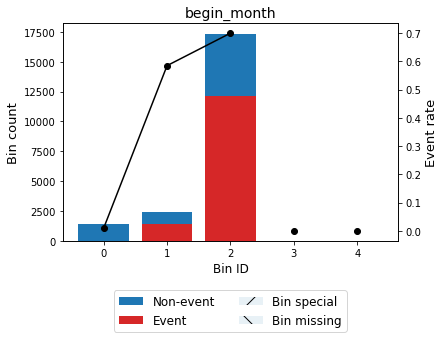

In [87]:
variable = 'begin_month'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [88]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['begin_month'], metric="bins")
train_df['begin_month_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['begin_month'], metric="bins")
test_df['begin_month_bin'] = x_test_transform_bins

- Categorical Data

In [89]:
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

,val,IV
8,UserCode,4.835078
7,occyp_type,0.009250
5,family_type,0.003944
3,income_type,0.002623
11,email,0.001939
6,house_type,0.001844
12,family_size,0.001750
1,car,0.001602
2,reality,0.001600
0,gender,0.000364


In [90]:
# variable = 'UserCode'

# x = train_df[variable].values
# y = train_df.credit

# optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
# optb.fit(x, y)
    
# binning_table = optb.binning_table
# v1 = binning_table.build()
    
# display(v1)
# binning_table.plot(metric = 'event_rate')

In [91]:
# # train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_train_transform_bins = optb.transform(train_df['UserCode'], metric="bins")
# train_df['UserCode_bin'] = x_train_transform_bins

# # test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_test_transform_bins = optb.transform(test_df['UserCode'], metric="bins")
# test_df['UserCode_bin'] = x_test_transform_bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Waiters/barmen staff, Secretaries, High skill...",2770,0.131000,1081,1689,0.609747,0.134496,0.002412,0.000301
1,"[Accountants, Cooking staff]",1090,0.051549,409,681,0.624771,0.070899,0.000262,0.000033
2,[Laborers],3612,0.170821,1340,2272,0.629014,0.052755,0.000479,0.000060
3,[Sales staff],2011,0.095105,742,1269,0.631029,0.044111,0.000186,0.000023
4,"[Core staff, Low-skill Laborers]",2186,0.103381,802,1384,0.633120,0.035122,0.000128,0.000016
5,"[Private service staff, Retired_Pensioner, IT ...",2048,0.096855,730,1318,0.643555,-0.01008,0.000010,0.000001
6,[Drivers],1219,0.057650,429,790,0.648072,-0.02983,0.000051,0.000006
7,"[Cleaning staff, Workers]",3215,0.152045,1093,2122,0.660031,-0.082687,0.001027,0.000128
8,[Managers],1772,0.083802,591,1181,0.666479,-0.111555,0.001026,0.000128
9,"[Medicine staff, Security staff, Realty agents...",1222,0.057791,369,853,0.698036,-0.257217,0.003670,0.000457


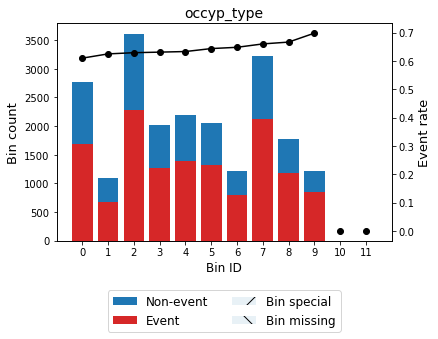

In [92]:
variable = 'occyp_type'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [93]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['occyp_type'], metric="bins")
train_df['occyp_type_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['occyp_type'], metric="bins")
test_df['occyp_type_bin'] = x_test_transform_bins

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21145 entries, 0 to 21164
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21145 non-null  int64  
 1   gender         21145 non-null  object 
 2   car            21145 non-null  object 
 3   reality        21145 non-null  object 
 4   child_num      21145 non-null  int64  
 5   income_total   21145 non-null  float64
 6   income_type    21145 non-null  object 
 7   edu_type       21145 non-null  object 
 8   family_type    21145 non-null  object 
 9   house_type     21145 non-null  object 
 10  DAYS_BIRTH     21145 non-null  int64  
 11  DAYS_EMPLOYED  21145 non-null  int64  
 12  FLAG_MOBIL     21145 non-null  int64  
 13  work_phone     21145 non-null  int64  
 14  phone          21145 non-null  int64  
 15  email          21145 non-null  int64  
 16  occyp_type     21145 non-null  object 
 17  family_size    21145 non-null  float64
 18  begin_month

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5292 non-null   int64  
 1   gender         5292 non-null   object 
 2   car            5292 non-null   object 
 3   reality        5292 non-null   object 
 4   child_num      5292 non-null   int64  
 5   income_total   5292 non-null   float64
 6   income_type    5292 non-null   object 
 7   edu_type       5292 non-null   object 
 8   family_type    5292 non-null   object 
 9   house_type     5292 non-null   object 
 10  DAYS_BIRTH     5292 non-null   int64  
 11  DAYS_EMPLOYED  5292 non-null   int64  
 12  FLAG_MOBIL     5292 non-null   int64  
 13  work_phone     5292 non-null   int64  
 14  phone          5292 non-null   int64  
 15  email          5292 non-null   int64  
 16  occyp_type     5292 non-null   object 
 17  family_size    5292 non-null   float64
 18  begin_mo

### Scaling

1) Numerical column, Categorical column 나누기

In [96]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [97]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [98]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'credit', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d', 'cluster']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'begin_month_bin', 'occyp_type_bin', 'work_phone', 'phone', 'email', 'family_size']


2) income_total, income_pow 컬럼은 로그변환 수행

In [99]:
train_df['income_total'] = np.log1p(1+train_df['income_total'])
test_df['income_total'] = np.log1p(1+test_df['income_total'])

train_df['income_pow'] = np.log1p(1+train_df['income_pow'])
test_df['income_pow'] = np.log1p(1+test_df['income_pow'])

3) Categorical data에 대해 Original Encoder 수행

In [100]:
encoder = OrdinalEncoder(categorical_list)
train_df[categorical_list] = encoder.fit_transform(train_df[categorical_list], train_df['credit'])
test_df[categorical_list] = encoder.transform(test_df[categorical_list])

In [101]:
train_df['UserCode'] = train_df['UserCode'].astype('int64')
test_df['UserCode'] = test_df['UserCode'].astype('int64')

4) Standard Scaler

In [102]:
numerical_list.remove('income_total')
numerical_list.remove('credit')

scaler = StandardScaler()
train_df[numerical_list] = scaler.fit_transform(train_df[numerical_list])
test_df[numerical_list] = scaler.transform(test_df[numerical_list])

### 다중공선성 분석

1) VIF 분석

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# numerical_list에 저장된 컬럼에 대해 데이터프레임 생성
numerical_df = train_df[numerical_list]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

In [104]:
vif_data[vif_data["VIF"] >= 10]

,feature,VIF
1,DAYS_BIRTH,inf
2,DAYS_EMPLOYED,inf
3,begin_month,inf
4,age,1809.480845
5,before_EMPLOYED,inf
6,income_total_befofeEMP_ratio,12.277645
11,Age_group,17.586288
12,EMPLOYED,790.079379
15,ability,15.560374
19,begin_month_y,23.844883


In [105]:
columns_to_drop = ['begin_month_d', 'begin_month_w', 'begin_month_y', 'age', 'before_EMPLOYED',
                    'EMPLOYED', 'Age_group', 'income_total_befofeEMP_ratio']
for i in columns_to_drop : 
    numerical_list.remove(i)

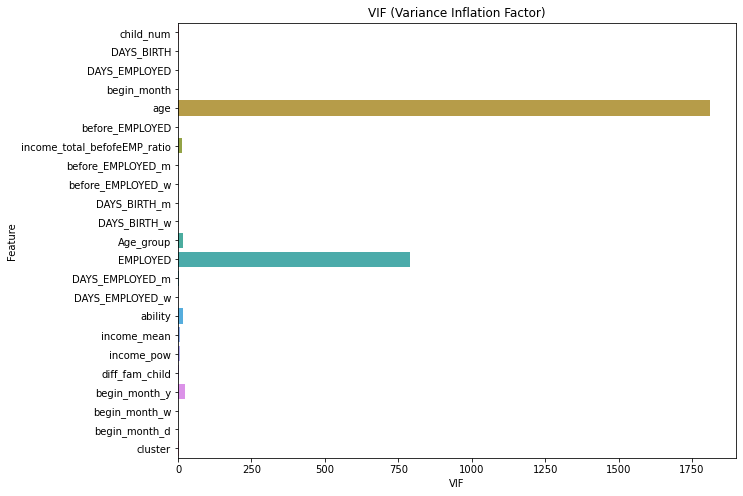

In [106]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x="VIF", y="feature", data=vif_data)
plt.title("VIF (Variance Inflation Factor)")
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.show()

In [107]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21145 entries, 0 to 21164
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             21145 non-null  int32  
 1   car                21145 non-null  int32  
 2   reality            21145 non-null  int32  
 3   child_num          21145 non-null  float64
 4   income_total       21145 non-null  float64
 5   income_type        21145 non-null  int32  
 6   edu_type           21145 non-null  int32  
 7   family_type        21145 non-null  int32  
 8   house_type         21145 non-null  int32  
 9   DAYS_BIRTH         21145 non-null  float64
 10  DAYS_EMPLOYED      21145 non-null  float64
 11  work_phone         21145 non-null  int64  
 12  phone              21145 non-null  int64  
 13  email              21145 non-null  int64  
 14  occyp_type         21145 non-null  int32  
 15  family_size        21145 non-null  float64
 16  begin_month        21145 no

2) 상관관계 분석

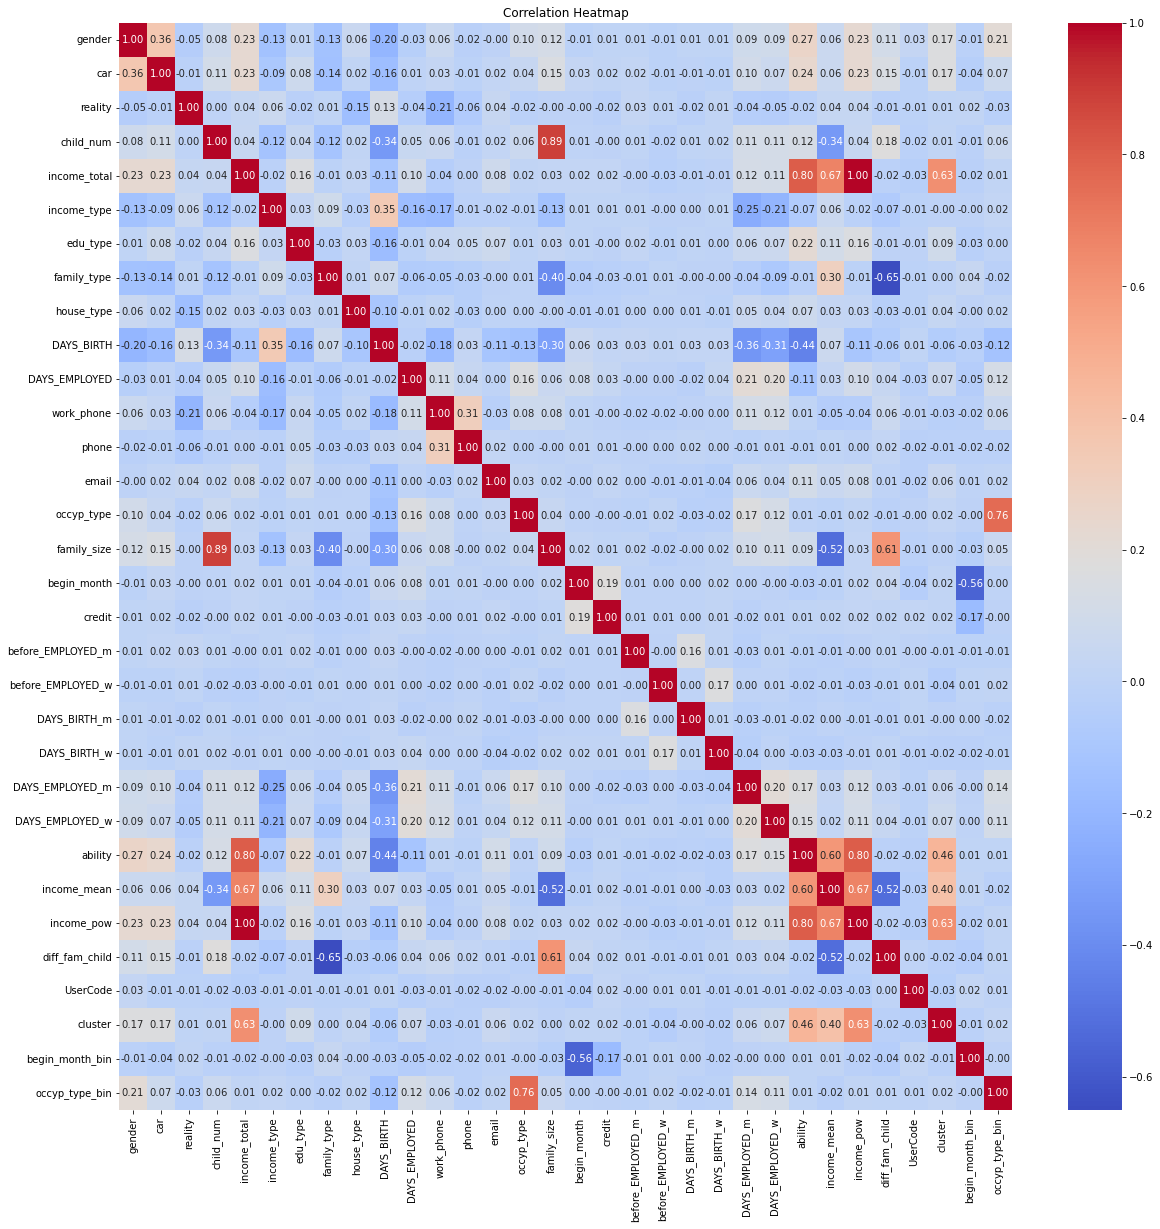

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 구하기
correlation_matrix = train_df.corr()

# heatmap 시각화
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [110]:
# correlation_matrix에서 0.7 이상인 상관관계를 가진 컬럼 쌍 찾기
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation_columns.add(colname)
            colname = correlation_matrix.columns[j]
            high_correlation_columns.add(colname)

# 상관관계가 0.7 이상인 컬럼들 출력
display("상관관계가 0.7 이상인 컬럼들:", high_correlation_columns)

'상관관계가 0.7 이상인 컬럼들:'

{'ability',
 'child_num',
 'family_size',
 'income_pow',
 'income_total',
 'occyp_type',
 'occyp_type_bin'}

3) 컬럼 제거

In [111]:
columns_to_drop = ['ability', 'income_total', 'child_num']

In [112]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

### Modeling

1) 학습, 테스트 데이터셋 재정의

In [113]:
y_train = train_df['credit']
x_train = train_df.drop('credit', axis=1)
x_test = test_df.drop('credit', axis=1)
y_test = test_df['credit']

In [114]:
# x_train = x_train.drop(["CustomerID"], axis=1)
# x_test = x_test.drop(["CustomerID"], axis=1)

In [115]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21145 entries, 0 to 21164
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             21145 non-null  int32  
 1   car                21145 non-null  int32  
 2   reality            21145 non-null  int32  
 3   income_type        21145 non-null  int32  
 4   edu_type           21145 non-null  int32  
 5   family_type        21145 non-null  int32  
 6   house_type         21145 non-null  int32  
 7   DAYS_BIRTH         21145 non-null  float64
 8   DAYS_EMPLOYED      21145 non-null  float64
 9   work_phone         21145 non-null  int64  
 10  phone              21145 non-null  int64  
 11  email              21145 non-null  int64  
 12  occyp_type         21145 non-null  int32  
 13  family_size        21145 non-null  float64
 14  begin_month        21145 non-null  float64
 15  before_EMPLOYED_m  21145 non-null  float64
 16  before_EMPLOYED_w  21145 no

In [116]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5292 entries, 0 to 5291
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5292 non-null   int32  
 1   car                5292 non-null   int32  
 2   reality            5292 non-null   int32  
 3   income_type        5292 non-null   int32  
 4   edu_type           5292 non-null   int32  
 5   family_type        5292 non-null   int32  
 6   house_type         5292 non-null   int32  
 7   DAYS_BIRTH         5292 non-null   float64
 8   DAYS_EMPLOYED      5292 non-null   float64
 9   work_phone         5292 non-null   int64  
 10  phone              5292 non-null   int64  
 11  email              5292 non-null   int64  
 12  occyp_type         5292 non-null   int32  
 13  family_size        5292 non-null   float64
 14  begin_month        5292 non-null   float64
 15  before_EMPLOYED_m  5292 non-null   float64
 16  before_EMPLOYED_w  5292 non-n

In [117]:
n_est = 2000
seed = 42
n_fold = 5
n_class = 2

In [118]:
# x_train['CustomerID_bin'] = x_train['CustomerID_bin'].astype('str')
# x_test['CustomerID_bin'] = test_df['CustomerID_bin'].astype('str')

### 1) Catboost Calssifier 단일모델

In [119]:
# from sklearn.model_selection import StratifiedKFold
# from catboost import CatBoostClassifier
# from sklearn.metrics import log_loss
# from catboost import Pool
# pd.DataFrame.iteritems = pd.DataFrame.items

# # StratifiedKFold를 사용하여 데이터를 분할합니다.
# skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
# folds = []
# for train_idx, valid_idx in skfold.split(x_train, y_train):
#     folds.append((train_idx, valid_idx))

# cat_pred = np.zeros((x_train.shape[0], n_class))
# cat_pred_test = np.zeros((x_test.shape[0], n_class))

# cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

# for fold, (train_idx, valid_idx) in enumerate(folds):
#     print(f'\n----------------- Fold {fold} -----------------\n')
    
#     # 인덱스를 사용하여 훈련 및 검증 데이터를 분할합니다.
#     X_train, X_valid = x_train.iloc[train_idx], x_train.iloc[valid_idx]
#     Y_train, Y_valid = y_train.iloc[train_idx], y_train.iloc[valid_idx]
    
#     # 훈련 데이터를 CatBoost의 Pool 객체로 변환합니다.
#     train_data = Pool(data=X_train, label=Y_train, cat_features=cat_cols)
#     valid_data = Pool(data=X_valid, label=Y_valid, cat_features=cat_cols)
    
#     # CatBoost 모델을 초기화하고 훈련합니다.
#     model_cat = CatBoostClassifier()
#     model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
    
#     # 검증 데이터에 대한 예측을 수행하고 결과를 저장합니다.
#     cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
#     cat_pred_test += model_cat.predict_proba(x_test) / n_fold
    
#     # 검증 데이터에 대한 Log Loss를 계산하여 출력합니다.
#     print(f'CV Log Loss Score: {log_loss(Y_valid, cat_pred[valid_idx]):.6f}')

# # 전체 데이터에 대한 Log Loss를 계산하여 출력합니다.
# print(f'\tLog Loss: {log_loss(y_train, cat_pred):.6f}')

# # coufision matrix
# print(f"모델의 최고 정확도 : {model_cat.best_score_}")

In [120]:
# # 최적 조합을 활용해서 값 예측
# pred_y_cat_proba = model_cat.predict_proba(x_test)
# pred_y_cat = model_cat.predict(x_test)

# from sklearn.metrics import log_loss

# # 테스트 데이터에 대한 예측 결과 확인
# test_log_loss = log_loss(y_test, cat_pred_test)
# print(f'Test Log Loss Score: {test_log_loss:.6f}')

In [121]:
# # confusion matric 출력
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# cnf_matrix = confusion_matrix(y_test, pred_y_cat)

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

In [122]:
# # 결과 리포트 출력
# from sklearn.metrics import classification_report

# print(classification_report(y_test, pred_y_cat))

In [123]:
# from sklearn.metrics import recall_score

# # y_true: 실제 레이블, y_pred: 예측된 레이블
# # average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
# recall = recall_score(y_test, pred_y_cat, average='macro')


# print(f'Recall Score: {recall:.6f}')


In [124]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [125]:
# plot_feature_importance(model_cat.get_feature_importance(),x_test.columns,'CATBOOST')

### GridSearchCV & CatBoost Classifier

In [126]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from catboost import Pool
import numpy as np
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items


# CatBoost 모델 객체 생성
model_cat = CatBoostClassifier()

param_grid = {
    'l2_leaf_reg': [1, 2],
    'iterations': [200],    
    'learning_rate': [0.1],
    'depth': [4, 5, 6],
    'random_strength': [1],
}

cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode']

# GridSearchCV 객체 생성
grid_search_cat = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss',refit = True, verbose = 100)

# 그리드서치를 사용하여 모델 학습
grid_search_cat.fit(x_train, y_train, cat_features=cat_cols)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_cat.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_cat_proba = grid_search_cat.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_cat_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 0.6729891	total: 179ms	remaining: 35.6s
1:	learn: 0.6513240	total: 202ms	remaining: 20s
2:	learn: 0.6348140	total: 226ms	remaining: 14.9s
3:	learn: 0.6226712	total: 244ms	remaining: 12s
4:	learn: 0.6156654	total: 265ms	remaining: 10.3s
5:	learn: 0.6017886	total: 288ms	remaining: 9.33s
6:	learn: 0.5895483	total: 309ms	remaining: 8.53s
7:	learn: 0.5811205	total: 348ms	remaining: 8.34s
8:	learn: 0.5742004	total: 371ms	remaining: 7.87s
9:	learn: 0.5687533	total: 394ms	remaining: 7.49s
10:	learn: 0.5629572	total: 418ms	remaining: 7.18s
11:	learn: 0.5597764	total: 441ms	remaining: 6.9s
12:	learn: 0.5571247	total: 463ms	remaining: 6.66s
13:	learn: 0.5555351	total: 479ms	remaining: 6.36s
14:	learn: 0.5536798	total: 502ms	remaining: 6.19s
15:	learn: 0.5523892	total: 524ms	remaining: 6.02s
16:	learn: 0.5494170	total: 545ms	remainin

158:	learn: 0.5269623	total: 3.82s	remaining: 986ms
159:	learn: 0.5268772	total: 3.85s	remaining: 961ms
160:	learn: 0.5268316	total: 3.87s	remaining: 937ms
161:	learn: 0.5267234	total: 3.89s	remaining: 913ms
162:	learn: 0.5266484	total: 3.91s	remaining: 888ms
163:	learn: 0.5265709	total: 3.93s	remaining: 864ms
164:	learn: 0.5265466	total: 3.96s	remaining: 839ms
165:	learn: 0.5264528	total: 3.98s	remaining: 815ms
166:	learn: 0.5262999	total: 4s	remaining: 791ms
167:	learn: 0.5261694	total: 4.02s	remaining: 766ms
168:	learn: 0.5261006	total: 4.05s	remaining: 742ms
169:	learn: 0.5259876	total: 4.07s	remaining: 718ms
170:	learn: 0.5258525	total: 4.09s	remaining: 694ms
171:	learn: 0.5257698	total: 4.11s	remaining: 670ms
172:	learn: 0.5256998	total: 4.14s	remaining: 646ms
173:	learn: 0.5256563	total: 4.16s	remaining: 622ms
174:	learn: 0.5255637	total: 4.19s	remaining: 598ms
175:	learn: 0.5254434	total: 4.21s	remaining: 574ms
176:	learn: 0.5253852	total: 4.23s	remaining: 550ms
177:	learn: 0.5

119:	learn: 0.5285066	total: 2.44s	remaining: 1.63s
120:	learn: 0.5284578	total: 2.46s	remaining: 1.61s
121:	learn: 0.5283803	total: 2.48s	remaining: 1.59s
122:	learn: 0.5282586	total: 2.5s	remaining: 1.57s
123:	learn: 0.5280635	total: 2.52s	remaining: 1.54s
124:	learn: 0.5280138	total: 2.54s	remaining: 1.52s
125:	learn: 0.5278306	total: 2.56s	remaining: 1.5s
126:	learn: 0.5277688	total: 2.58s	remaining: 1.48s
127:	learn: 0.5275591	total: 2.6s	remaining: 1.46s
128:	learn: 0.5275040	total: 2.62s	remaining: 1.44s
129:	learn: 0.5273542	total: 2.64s	remaining: 1.42s
130:	learn: 0.5272131	total: 2.66s	remaining: 1.4s
131:	learn: 0.5270655	total: 2.68s	remaining: 1.38s
132:	learn: 0.5269721	total: 2.7s	remaining: 1.36s
133:	learn: 0.5267721	total: 2.72s	remaining: 1.34s
134:	learn: 0.5266675	total: 2.74s	remaining: 1.32s
135:	learn: 0.5266143	total: 2.76s	remaining: 1.3s
136:	learn: 0.5263959	total: 2.78s	remaining: 1.28s
137:	learn: 0.5262491	total: 2.8s	remaining: 1.26s
138:	learn: 0.52615

79:	learn: 0.5343242	total: 1.57s	remaining: 2.35s
80:	learn: 0.5342330	total: 1.59s	remaining: 2.33s
81:	learn: 0.5341613	total: 1.61s	remaining: 2.31s
82:	learn: 0.5340438	total: 1.63s	remaining: 2.29s
83:	learn: 0.5339435	total: 1.65s	remaining: 2.27s
84:	learn: 0.5335348	total: 1.66s	remaining: 2.25s
85:	learn: 0.5334799	total: 1.68s	remaining: 2.23s
86:	learn: 0.5334612	total: 1.7s	remaining: 2.21s
87:	learn: 0.5333099	total: 1.72s	remaining: 2.19s
88:	learn: 0.5332045	total: 1.76s	remaining: 2.19s
89:	learn: 0.5331763	total: 1.78s	remaining: 2.17s
90:	learn: 0.5330788	total: 1.8s	remaining: 2.15s
91:	learn: 0.5329552	total: 1.82s	remaining: 2.14s
92:	learn: 0.5327981	total: 1.85s	remaining: 2.13s
93:	learn: 0.5327214	total: 1.87s	remaining: 2.1s
94:	learn: 0.5326335	total: 1.89s	remaining: 2.08s
95:	learn: 0.5325761	total: 1.9s	remaining: 2.06s
96:	learn: 0.5324769	total: 1.92s	remaining: 2.04s
97:	learn: 0.5324508	total: 1.94s	remaining: 2.02s
98:	learn: 0.5321493	total: 1.96s	r

37:	learn: 0.5388802	total: 778ms	remaining: 3.32s
38:	learn: 0.5386706	total: 797ms	remaining: 3.29s
39:	learn: 0.5384313	total: 814ms	remaining: 3.26s
40:	learn: 0.5383343	total: 833ms	remaining: 3.23s
41:	learn: 0.5382645	total: 850ms	remaining: 3.2s
42:	learn: 0.5378349	total: 883ms	remaining: 3.22s
43:	learn: 0.5376046	total: 901ms	remaining: 3.19s
44:	learn: 0.5374776	total: 919ms	remaining: 3.17s
45:	learn: 0.5373253	total: 938ms	remaining: 3.14s
46:	learn: 0.5371652	total: 959ms	remaining: 3.12s
47:	learn: 0.5370586	total: 982ms	remaining: 3.11s
48:	learn: 0.5369575	total: 1s	remaining: 3.1s
49:	learn: 0.5367528	total: 1.02s	remaining: 3.07s
50:	learn: 0.5365960	total: 1.04s	remaining: 3.05s
51:	learn: 0.5364910	total: 1.06s	remaining: 3.02s
52:	learn: 0.5364361	total: 1.08s	remaining: 2.99s
53:	learn: 0.5362802	total: 1.1s	remaining: 2.97s
54:	learn: 0.5360533	total: 1.12s	remaining: 2.94s
55:	learn: 0.5358829	total: 1.13s	remaining: 2.92s
56:	learn: 0.5357454	total: 1.15s	rem

198:	learn: 0.5230287	total: 4.12s	remaining: 20.7ms
199:	learn: 0.5228769	total: 4.14s	remaining: 0us
[CV 4/5; 1/6] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1;, score=-0.504 total time=   4.2s
[CV 5/5; 1/6] START depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 0.6730135	total: 19.2ms	remaining: 3.82s
1:	learn: 0.6507892	total: 41ms	remaining: 4.06s
2:	learn: 0.6389335	total: 51.4ms	remaining: 3.38s
3:	learn: 0.6251645	total: 72.4ms	remaining: 3.55s
4:	learn: 0.6150407	total: 93ms	remaining: 3.63s
5:	learn: 0.6000556	total: 114ms	remaining: 3.68s
6:	learn: 0.5909864	total: 138ms	remaining: 3.8s
7:	learn: 0.5818328	total: 158ms	remaining: 3.79s
8:	learn: 0.5745682	total: 181ms	remaining: 3.84s
9:	learn: 0.5685982	total: 200ms	remaining: 3.8s
10:	learn: 0.5640817	total: 219ms	remaining: 3.77s
11:	learn: 0.5604865	total: 239ms	remaining: 3.74s
12:	learn: 0.5572122	total: 260ms	remaining: 3.73s
13:	learn: 0.553663

154:	learn: 0.5246565	total: 3.26s	remaining: 947ms
155:	learn: 0.5245892	total: 3.29s	remaining: 927ms
156:	learn: 0.5244778	total: 3.31s	remaining: 906ms
157:	learn: 0.5243958	total: 3.33s	remaining: 886ms
158:	learn: 0.5242647	total: 3.36s	remaining: 866ms
159:	learn: 0.5241719	total: 3.38s	remaining: 845ms
160:	learn: 0.5241060	total: 3.41s	remaining: 825ms
161:	learn: 0.5240026	total: 3.43s	remaining: 805ms
162:	learn: 0.5238935	total: 3.46s	remaining: 784ms
163:	learn: 0.5237539	total: 3.48s	remaining: 764ms
164:	learn: 0.5235342	total: 3.5s	remaining: 743ms
165:	learn: 0.5234867	total: 3.53s	remaining: 722ms
166:	learn: 0.5234084	total: 3.55s	remaining: 702ms
167:	learn: 0.5233642	total: 3.57s	remaining: 681ms
168:	learn: 0.5233068	total: 3.59s	remaining: 659ms
169:	learn: 0.5231224	total: 3.62s	remaining: 638ms
170:	learn: 0.5230472	total: 3.65s	remaining: 619ms
171:	learn: 0.5230080	total: 3.67s	remaining: 598ms
172:	learn: 0.5229217	total: 3.69s	remaining: 576ms
173:	learn: 0

111:	learn: 0.5316560	total: 2.28s	remaining: 1.79s
112:	learn: 0.5314719	total: 2.31s	remaining: 1.78s
113:	learn: 0.5313757	total: 2.33s	remaining: 1.76s
114:	learn: 0.5313442	total: 2.35s	remaining: 1.74s
115:	learn: 0.5312100	total: 2.37s	remaining: 1.72s
116:	learn: 0.5311712	total: 2.39s	remaining: 1.7s
117:	learn: 0.5311292	total: 2.41s	remaining: 1.67s
118:	learn: 0.5310242	total: 2.43s	remaining: 1.65s
119:	learn: 0.5308587	total: 2.45s	remaining: 1.63s
120:	learn: 0.5306859	total: 2.47s	remaining: 1.61s
121:	learn: 0.5306414	total: 2.49s	remaining: 1.59s
122:	learn: 0.5305158	total: 2.51s	remaining: 1.57s
123:	learn: 0.5305027	total: 2.53s	remaining: 1.55s
124:	learn: 0.5303069	total: 2.55s	remaining: 1.53s
125:	learn: 0.5302609	total: 2.57s	remaining: 1.51s
126:	learn: 0.5301802	total: 2.59s	remaining: 1.49s
127:	learn: 0.5300896	total: 2.63s	remaining: 1.48s
128:	learn: 0.5300141	total: 2.65s	remaining: 1.46s
129:	learn: 0.5298088	total: 2.67s	remaining: 1.44s
130:	learn: 0

68:	learn: 0.5333038	total: 1.4s	remaining: 2.65s
69:	learn: 0.5331579	total: 1.42s	remaining: 2.63s
70:	learn: 0.5330315	total: 1.43s	remaining: 2.61s
71:	learn: 0.5328805	total: 1.45s	remaining: 2.58s
72:	learn: 0.5327717	total: 1.47s	remaining: 2.56s
73:	learn: 0.5327228	total: 1.49s	remaining: 2.54s
74:	learn: 0.5324022	total: 1.51s	remaining: 2.52s
75:	learn: 0.5323539	total: 1.53s	remaining: 2.5s
76:	learn: 0.5322802	total: 1.55s	remaining: 2.48s
77:	learn: 0.5322276	total: 1.57s	remaining: 2.46s
78:	learn: 0.5320961	total: 1.59s	remaining: 2.44s
79:	learn: 0.5319713	total: 1.61s	remaining: 2.42s
80:	learn: 0.5318779	total: 1.64s	remaining: 2.4s
81:	learn: 0.5316838	total: 1.66s	remaining: 2.38s
82:	learn: 0.5315936	total: 1.68s	remaining: 2.36s
83:	learn: 0.5314576	total: 1.7s	remaining: 2.34s
84:	learn: 0.5314131	total: 1.72s	remaining: 2.32s
85:	learn: 0.5312057	total: 1.74s	remaining: 2.3s
86:	learn: 0.5311764	total: 1.75s	remaining: 2.28s
87:	learn: 0.5311193	total: 1.77s	re

24:	learn: 0.5441317	total: 550ms	remaining: 3.85s
25:	learn: 0.5436762	total: 626ms	remaining: 4.19s
26:	learn: 0.5431925	total: 647ms	remaining: 4.15s
27:	learn: 0.5427747	total: 667ms	remaining: 4.09s
28:	learn: 0.5424229	total: 693ms	remaining: 4.09s
29:	learn: 0.5414643	total: 718ms	remaining: 4.07s
30:	learn: 0.5412792	total: 728ms	remaining: 3.97s
31:	learn: 0.5410622	total: 748ms	remaining: 3.93s
32:	learn: 0.5409067	total: 767ms	remaining: 3.88s
33:	learn: 0.5407672	total: 786ms	remaining: 3.84s
34:	learn: 0.5405196	total: 804ms	remaining: 3.79s
35:	learn: 0.5404198	total: 822ms	remaining: 3.75s
36:	learn: 0.5402636	total: 843ms	remaining: 3.71s
37:	learn: 0.5401642	total: 863ms	remaining: 3.68s
38:	learn: 0.5399598	total: 881ms	remaining: 3.64s
39:	learn: 0.5392382	total: 903ms	remaining: 3.61s
40:	learn: 0.5391034	total: 924ms	remaining: 3.58s
41:	learn: 0.5390006	total: 949ms	remaining: 3.57s
42:	learn: 0.5388864	total: 974ms	remaining: 3.56s
43:	learn: 0.5388186	total: 992

190:	learn: 0.5232097	total: 3.94s	remaining: 185ms
191:	learn: 0.5231580	total: 3.96s	remaining: 165ms
192:	learn: 0.5230814	total: 3.98s	remaining: 144ms
193:	learn: 0.5229811	total: 4s	remaining: 124ms
194:	learn: 0.5228594	total: 4.02s	remaining: 103ms
195:	learn: 0.5228020	total: 4.04s	remaining: 82.4ms
196:	learn: 0.5226467	total: 4.06s	remaining: 61.8ms
197:	learn: 0.5225960	total: 4.08s	remaining: 41.2ms
198:	learn: 0.5223923	total: 4.11s	remaining: 20.6ms
199:	learn: 0.5223650	total: 4.13s	remaining: 0us
[CV 3/5; 2/6] END depth=4, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.503 total time=   4.2s
[CV 4/5; 2/6] START depth=4, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1
0:	learn: 0.6738386	total: 21.3ms	remaining: 4.24s
1:	learn: 0.6522972	total: 44.1ms	remaining: 4.36s
2:	learn: 0.6359369	total: 65.2ms	remaining: 4.28s
3:	learn: 0.6237793	total: 85.7ms	remaining: 4.2s
4:	learn: 0.6150473	total: 107ms	remaining: 4.17s
5:

147:	learn: 0.5283103	total: 3.15s	remaining: 1.11s
148:	learn: 0.5282333	total: 3.17s	remaining: 1.08s
149:	learn: 0.5281507	total: 3.19s	remaining: 1.06s
150:	learn: 0.5279515	total: 3.21s	remaining: 1.04s
151:	learn: 0.5278799	total: 3.23s	remaining: 1.02s
152:	learn: 0.5277984	total: 3.25s	remaining: 998ms
153:	learn: 0.5276454	total: 3.27s	remaining: 978ms
154:	learn: 0.5276081	total: 3.29s	remaining: 957ms
155:	learn: 0.5275394	total: 3.32s	remaining: 936ms
156:	learn: 0.5274973	total: 3.34s	remaining: 915ms
157:	learn: 0.5274464	total: 3.36s	remaining: 893ms
158:	learn: 0.5274284	total: 3.38s	remaining: 871ms
159:	learn: 0.5273747	total: 3.4s	remaining: 849ms
160:	learn: 0.5273227	total: 3.42s	remaining: 828ms
161:	learn: 0.5273129	total: 3.44s	remaining: 806ms
162:	learn: 0.5271754	total: 3.46s	remaining: 785ms
163:	learn: 0.5270178	total: 3.48s	remaining: 764ms
164:	learn: 0.5268520	total: 3.5s	remaining: 743ms
165:	learn: 0.5267195	total: 3.52s	remaining: 722ms
166:	learn: 0.

103:	learn: 0.5291968	total: 2.13s	remaining: 1.96s
104:	learn: 0.5290568	total: 2.15s	remaining: 1.94s
105:	learn: 0.5290286	total: 2.17s	remaining: 1.93s
106:	learn: 0.5288552	total: 2.19s	remaining: 1.91s
107:	learn: 0.5287698	total: 2.22s	remaining: 1.89s
108:	learn: 0.5286571	total: 2.24s	remaining: 1.87s
109:	learn: 0.5285495	total: 2.26s	remaining: 1.85s
110:	learn: 0.5285014	total: 2.28s	remaining: 1.83s
111:	learn: 0.5283532	total: 2.3s	remaining: 1.81s
112:	learn: 0.5282473	total: 2.32s	remaining: 1.79s
113:	learn: 0.5281227	total: 2.34s	remaining: 1.77s
114:	learn: 0.5281088	total: 2.36s	remaining: 1.75s
115:	learn: 0.5280408	total: 2.38s	remaining: 1.73s
116:	learn: 0.5279780	total: 2.4s	remaining: 1.71s
117:	learn: 0.5279146	total: 2.42s	remaining: 1.69s
118:	learn: 0.5278627	total: 2.45s	remaining: 1.67s
119:	learn: 0.5276871	total: 2.47s	remaining: 1.65s
120:	learn: 0.5275808	total: 2.49s	remaining: 1.63s
121:	learn: 0.5275100	total: 2.52s	remaining: 1.61s
122:	learn: 0.

59:	learn: 0.5335389	total: 1.49s	remaining: 3.47s
60:	learn: 0.5333885	total: 1.51s	remaining: 3.44s
61:	learn: 0.5332250	total: 1.53s	remaining: 3.42s
62:	learn: 0.5330512	total: 1.56s	remaining: 3.39s
63:	learn: 0.5328731	total: 1.58s	remaining: 3.36s
64:	learn: 0.5328083	total: 1.61s	remaining: 3.34s
65:	learn: 0.5326446	total: 1.63s	remaining: 3.31s
66:	learn: 0.5324664	total: 1.66s	remaining: 3.3s
67:	learn: 0.5322880	total: 1.69s	remaining: 3.28s
68:	learn: 0.5321698	total: 1.72s	remaining: 3.26s
69:	learn: 0.5320622	total: 1.77s	remaining: 3.29s
70:	learn: 0.5318803	total: 1.8s	remaining: 3.27s
71:	learn: 0.5317895	total: 1.82s	remaining: 3.24s
72:	learn: 0.5317439	total: 1.84s	remaining: 3.21s
73:	learn: 0.5316794	total: 1.87s	remaining: 3.18s
74:	learn: 0.5314168	total: 1.89s	remaining: 3.15s
75:	learn: 0.5312350	total: 1.92s	remaining: 3.13s
76:	learn: 0.5310812	total: 1.94s	remaining: 3.1s
77:	learn: 0.5309988	total: 1.97s	remaining: 3.07s
78:	learn: 0.5309028	total: 1.99s	

17:	learn: 0.5457485	total: 458ms	remaining: 4.63s
18:	learn: 0.5445995	total: 482ms	remaining: 4.59s
19:	learn: 0.5437379	total: 508ms	remaining: 4.58s
20:	learn: 0.5429292	total: 537ms	remaining: 4.58s
21:	learn: 0.5424236	total: 567ms	remaining: 4.59s
22:	learn: 0.5418444	total: 608ms	remaining: 4.68s
23:	learn: 0.5413669	total: 634ms	remaining: 4.65s
24:	learn: 0.5405718	total: 660ms	remaining: 4.62s
25:	learn: 0.5398686	total: 685ms	remaining: 4.58s
26:	learn: 0.5395894	total: 703ms	remaining: 4.51s
27:	learn: 0.5393833	total: 728ms	remaining: 4.47s
28:	learn: 0.5383082	total: 753ms	remaining: 4.44s
29:	learn: 0.5380062	total: 786ms	remaining: 4.45s
30:	learn: 0.5376568	total: 810ms	remaining: 4.41s
31:	learn: 0.5375202	total: 825ms	remaining: 4.33s
32:	learn: 0.5373351	total: 848ms	remaining: 4.29s
33:	learn: 0.5371325	total: 874ms	remaining: 4.26s
34:	learn: 0.5370025	total: 893ms	remaining: 4.21s
35:	learn: 0.5368162	total: 919ms	remaining: 4.18s
36:	learn: 0.5365347	total: 944

180:	learn: 0.5125474	total: 4.68s	remaining: 492ms
181:	learn: 0.5124021	total: 4.71s	remaining: 466ms
182:	learn: 0.5123172	total: 4.73s	remaining: 440ms
183:	learn: 0.5122099	total: 4.76s	remaining: 414ms
184:	learn: 0.5120248	total: 4.78s	remaining: 388ms
185:	learn: 0.5118633	total: 4.81s	remaining: 362ms
186:	learn: 0.5117873	total: 4.83s	remaining: 336ms
187:	learn: 0.5115122	total: 4.85s	remaining: 310ms
188:	learn: 0.5113614	total: 4.88s	remaining: 284ms
189:	learn: 0.5112682	total: 4.9s	remaining: 258ms
190:	learn: 0.5111989	total: 4.92s	remaining: 232ms
191:	learn: 0.5110038	total: 4.96s	remaining: 207ms
192:	learn: 0.5108134	total: 4.99s	remaining: 181ms
193:	learn: 0.5106583	total: 5.02s	remaining: 155ms
194:	learn: 0.5104478	total: 5.04s	remaining: 129ms
195:	learn: 0.5102375	total: 5.07s	remaining: 103ms
196:	learn: 0.5099844	total: 5.09s	remaining: 77.5ms
197:	learn: 0.5097003	total: 5.12s	remaining: 51.7ms
198:	learn: 0.5095288	total: 5.14s	remaining: 25.8ms
199:	learn

141:	learn: 0.5214364	total: 3.63s	remaining: 1.48s
142:	learn: 0.5213413	total: 3.65s	remaining: 1.46s
143:	learn: 0.5211009	total: 3.68s	remaining: 1.43s
144:	learn: 0.5208898	total: 3.7s	remaining: 1.4s
145:	learn: 0.5205296	total: 3.73s	remaining: 1.38s
146:	learn: 0.5204214	total: 3.75s	remaining: 1.35s
147:	learn: 0.5199889	total: 3.77s	remaining: 1.33s
148:	learn: 0.5196225	total: 3.8s	remaining: 1.3s
149:	learn: 0.5195456	total: 3.82s	remaining: 1.27s
150:	learn: 0.5194806	total: 3.85s	remaining: 1.25s
151:	learn: 0.5192381	total: 3.87s	remaining: 1.22s
152:	learn: 0.5191406	total: 3.9s	remaining: 1.2s
153:	learn: 0.5189839	total: 3.92s	remaining: 1.17s
154:	learn: 0.5187402	total: 3.95s	remaining: 1.15s
155:	learn: 0.5186010	total: 3.97s	remaining: 1.12s
156:	learn: 0.5183575	total: 4.01s	remaining: 1.1s
157:	learn: 0.5182444	total: 4.03s	remaining: 1.07s
158:	learn: 0.5180948	total: 4.06s	remaining: 1.05s
159:	learn: 0.5179600	total: 4.08s	remaining: 1.02s
160:	learn: 0.51785

101:	learn: 0.5266241	total: 2.61s	remaining: 2.51s
102:	learn: 0.5266026	total: 2.63s	remaining: 2.48s
103:	learn: 0.5264513	total: 2.66s	remaining: 2.45s
104:	learn: 0.5263176	total: 2.69s	remaining: 2.43s
105:	learn: 0.5261259	total: 2.71s	remaining: 2.4s
106:	learn: 0.5259391	total: 2.73s	remaining: 2.38s
107:	learn: 0.5258527	total: 2.76s	remaining: 2.35s
108:	learn: 0.5256292	total: 2.78s	remaining: 2.32s
109:	learn: 0.5255668	total: 2.81s	remaining: 2.3s
110:	learn: 0.5253973	total: 2.83s	remaining: 2.27s
111:	learn: 0.5251760	total: 2.86s	remaining: 2.25s
112:	learn: 0.5250974	total: 2.89s	remaining: 2.23s
113:	learn: 0.5250514	total: 2.92s	remaining: 2.2s
114:	learn: 0.5249798	total: 2.94s	remaining: 2.17s
115:	learn: 0.5248427	total: 2.98s	remaining: 2.16s
116:	learn: 0.5246749	total: 3.01s	remaining: 2.14s
117:	learn: 0.5245661	total: 3.04s	remaining: 2.11s
118:	learn: 0.5244363	total: 3.07s	remaining: 2.09s
119:	learn: 0.5243684	total: 3.1s	remaining: 2.06s
120:	learn: 0.52

62:	learn: 0.5295405	total: 1.57s	remaining: 3.43s
63:	learn: 0.5293843	total: 1.6s	remaining: 3.4s
64:	learn: 0.5292174	total: 1.63s	remaining: 3.38s
65:	learn: 0.5290904	total: 1.65s	remaining: 3.35s
66:	learn: 0.5289369	total: 1.68s	remaining: 3.33s
67:	learn: 0.5288253	total: 1.71s	remaining: 3.32s
68:	learn: 0.5286797	total: 1.74s	remaining: 3.3s
69:	learn: 0.5285830	total: 1.77s	remaining: 3.28s
70:	learn: 0.5284736	total: 1.79s	remaining: 3.26s
71:	learn: 0.5283620	total: 1.82s	remaining: 3.24s
72:	learn: 0.5281908	total: 1.84s	remaining: 3.21s
73:	learn: 0.5280938	total: 1.87s	remaining: 3.19s
74:	learn: 0.5280169	total: 1.91s	remaining: 3.18s
75:	learn: 0.5279089	total: 1.93s	remaining: 3.15s
76:	learn: 0.5277503	total: 1.96s	remaining: 3.13s
77:	learn: 0.5276117	total: 1.99s	remaining: 3.1s
78:	learn: 0.5273961	total: 2.01s	remaining: 3.08s
79:	learn: 0.5268500	total: 2.04s	remaining: 3.06s
80:	learn: 0.5268265	total: 2.06s	remaining: 3.03s
81:	learn: 0.5265890	total: 2.09s	r

25:	learn: 0.5405321	total: 593ms	remaining: 3.97s
26:	learn: 0.5402810	total: 616ms	remaining: 3.94s
27:	learn: 0.5398766	total: 638ms	remaining: 3.92s
28:	learn: 0.5396422	total: 664ms	remaining: 3.91s
29:	learn: 0.5391929	total: 687ms	remaining: 3.89s
30:	learn: 0.5388210	total: 711ms	remaining: 3.88s
31:	learn: 0.5384034	total: 748ms	remaining: 3.93s
32:	learn: 0.5381936	total: 773ms	remaining: 3.91s
33:	learn: 0.5379369	total: 800ms	remaining: 3.9s
34:	learn: 0.5377348	total: 824ms	remaining: 3.89s
35:	learn: 0.5375899	total: 849ms	remaining: 3.87s
36:	learn: 0.5374578	total: 875ms	remaining: 3.85s
37:	learn: 0.5372178	total: 899ms	remaining: 3.83s
38:	learn: 0.5370076	total: 928ms	remaining: 3.83s
39:	learn: 0.5368325	total: 954ms	remaining: 3.81s
40:	learn: 0.5364614	total: 980ms	remaining: 3.8s
41:	learn: 0.5362390	total: 1s	remaining: 3.77s
42:	learn: 0.5360948	total: 1.03s	remaining: 3.76s
43:	learn: 0.5359431	total: 1.05s	remaining: 3.74s
44:	learn: 0.5355757	total: 1.08s	re

191:	learn: 0.5141979	total: 4.85s	remaining: 202ms
192:	learn: 0.5141270	total: 4.88s	remaining: 177ms
193:	learn: 0.5139061	total: 4.91s	remaining: 152ms
194:	learn: 0.5137953	total: 4.94s	remaining: 127ms
195:	learn: 0.5137677	total: 4.96s	remaining: 101ms
196:	learn: 0.5137222	total: 4.99s	remaining: 76ms
197:	learn: 0.5136529	total: 5.02s	remaining: 50.7ms
198:	learn: 0.5134423	total: 5.05s	remaining: 25.4ms
199:	learn: 0.5133102	total: 5.07s	remaining: 0us
[CV 1/5; 4/6] END depth=5, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.509 total time=   5.1s
[CV 2/5; 4/6] START depth=5, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1
0:	learn: 0.6656904	total: 26.8ms	remaining: 5.34s
1:	learn: 0.6456477	total: 56.5ms	remaining: 5.59s
2:	learn: 0.6307425	total: 86.1ms	remaining: 5.66s
3:	learn: 0.6193315	total: 117ms	remaining: 5.72s
4:	learn: 0.6125766	total: 131ms	remaining: 5.09s
5:	learn: 0.5970716	total: 160ms	remaining: 5.18s
6:	l

147:	learn: 0.5188773	total: 3.99s	remaining: 1.4s
148:	learn: 0.5186307	total: 4.03s	remaining: 1.38s
149:	learn: 0.5184575	total: 4.06s	remaining: 1.35s
150:	learn: 0.5182911	total: 4.08s	remaining: 1.32s
151:	learn: 0.5182394	total: 4.11s	remaining: 1.3s
152:	learn: 0.5180159	total: 4.13s	remaining: 1.27s
153:	learn: 0.5177930	total: 4.16s	remaining: 1.24s
154:	learn: 0.5174994	total: 4.18s	remaining: 1.22s
155:	learn: 0.5174150	total: 4.21s	remaining: 1.19s
156:	learn: 0.5172490	total: 4.23s	remaining: 1.16s
157:	learn: 0.5171384	total: 4.26s	remaining: 1.13s
158:	learn: 0.5170622	total: 4.29s	remaining: 1.1s
159:	learn: 0.5169720	total: 4.31s	remaining: 1.08s
160:	learn: 0.5166471	total: 4.33s	remaining: 1.05s
161:	learn: 0.5165658	total: 4.36s	remaining: 1.02s
162:	learn: 0.5164274	total: 4.38s	remaining: 996ms
163:	learn: 0.5161942	total: 4.42s	remaining: 970ms
164:	learn: 0.5160839	total: 4.44s	remaining: 943ms
165:	learn: 0.5159748	total: 4.47s	remaining: 915ms
166:	learn: 0.5

107:	learn: 0.5270356	total: 2.77s	remaining: 2.36s
108:	learn: 0.5268270	total: 2.8s	remaining: 2.34s
109:	learn: 0.5267391	total: 2.83s	remaining: 2.31s
110:	learn: 0.5266765	total: 2.85s	remaining: 2.29s
111:	learn: 0.5265111	total: 2.88s	remaining: 2.26s
112:	learn: 0.5263215	total: 2.91s	remaining: 2.24s
113:	learn: 0.5261823	total: 2.93s	remaining: 2.21s
114:	learn: 0.5261053	total: 2.96s	remaining: 2.19s
115:	learn: 0.5258719	total: 3.02s	remaining: 2.18s
116:	learn: 0.5255154	total: 3.04s	remaining: 2.16s
117:	learn: 0.5254551	total: 3.07s	remaining: 2.13s
118:	learn: 0.5251592	total: 3.1s	remaining: 2.11s
119:	learn: 0.5250722	total: 3.13s	remaining: 2.09s
120:	learn: 0.5249422	total: 3.16s	remaining: 2.06s
121:	learn: 0.5248245	total: 3.18s	remaining: 2.03s
122:	learn: 0.5246039	total: 3.2s	remaining: 2.01s
123:	learn: 0.5245569	total: 3.23s	remaining: 1.98s
124:	learn: 0.5244641	total: 3.25s	remaining: 1.95s
125:	learn: 0.5243010	total: 3.27s	remaining: 1.92s
126:	learn: 0.5

66:	learn: 0.5319939	total: 1.69s	remaining: 3.36s
67:	learn: 0.5317122	total: 1.71s	remaining: 3.33s
68:	learn: 0.5315986	total: 1.74s	remaining: 3.3s
69:	learn: 0.5314771	total: 1.76s	remaining: 3.27s
70:	learn: 0.5312131	total: 1.78s	remaining: 3.24s
71:	learn: 0.5311455	total: 1.81s	remaining: 3.22s
72:	learn: 0.5310654	total: 1.83s	remaining: 3.19s
73:	learn: 0.5309161	total: 1.86s	remaining: 3.16s
74:	learn: 0.5307175	total: 1.88s	remaining: 3.14s
75:	learn: 0.5306251	total: 1.91s	remaining: 3.12s
76:	learn: 0.5305269	total: 1.94s	remaining: 3.1s
77:	learn: 0.5303342	total: 1.97s	remaining: 3.08s
78:	learn: 0.5300639	total: 1.99s	remaining: 3.05s
79:	learn: 0.5298957	total: 2.02s	remaining: 3.03s
80:	learn: 0.5298227	total: 2.05s	remaining: 3.01s
81:	learn: 0.5296802	total: 2.07s	remaining: 2.98s
82:	learn: 0.5295733	total: 2.1s	remaining: 2.96s
83:	learn: 0.5293526	total: 2.12s	remaining: 2.93s
84:	learn: 0.5292555	total: 2.15s	remaining: 2.91s
85:	learn: 0.5292286	total: 2.16s	

23:	learn: 0.5398603	total: 548ms	remaining: 4.02s
24:	learn: 0.5393487	total: 574ms	remaining: 4.02s
25:	learn: 0.5389437	total: 598ms	remaining: 4s
26:	learn: 0.5386593	total: 623ms	remaining: 3.99s
27:	learn: 0.5381124	total: 654ms	remaining: 4.02s
28:	learn: 0.5378250	total: 678ms	remaining: 4s
29:	learn: 0.5375258	total: 704ms	remaining: 3.99s
30:	learn: 0.5367547	total: 732ms	remaining: 3.99s
31:	learn: 0.5364602	total: 757ms	remaining: 3.97s
32:	learn: 0.5362481	total: 784ms	remaining: 3.97s
33:	learn: 0.5361967	total: 795ms	remaining: 3.88s
34:	learn: 0.5360226	total: 818ms	remaining: 3.86s
35:	learn: 0.5358815	total: 844ms	remaining: 3.85s
36:	learn: 0.5355898	total: 867ms	remaining: 3.82s
37:	learn: 0.5353796	total: 891ms	remaining: 3.8s
38:	learn: 0.5352672	total: 908ms	remaining: 3.75s
39:	learn: 0.5351637	total: 930ms	remaining: 3.72s
40:	learn: 0.5350775	total: 950ms	remaining: 3.68s
41:	learn: 0.5347697	total: 975ms	remaining: 3.67s
42:	learn: 0.5344790	total: 1s	remaini

188:	learn: 0.5134590	total: 4.75s	remaining: 277ms
189:	learn: 0.5134114	total: 4.78s	remaining: 251ms
190:	learn: 0.5133399	total: 4.8s	remaining: 226ms
191:	learn: 0.5132445	total: 4.82s	remaining: 201ms
192:	learn: 0.5131129	total: 4.85s	remaining: 176ms
193:	learn: 0.5130257	total: 4.89s	remaining: 151ms
194:	learn: 0.5129462	total: 4.91s	remaining: 126ms
195:	learn: 0.5128572	total: 4.94s	remaining: 101ms
196:	learn: 0.5128109	total: 4.97s	remaining: 75.6ms
197:	learn: 0.5127943	total: 5s	remaining: 50.5ms
198:	learn: 0.5126280	total: 5.02s	remaining: 25.2ms
199:	learn: 0.5125027	total: 5.05s	remaining: 0us
[CV 5/5; 4/6] END depth=5, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.510 total time=   5.1s
[CV 1/5; 5/6] START depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 0.6664442	total: 28.3ms	remaining: 5.64s
1:	learn: 0.6472186	total: 59.8ms	remaining: 5.92s
2:	learn: 0.6355768	total: 72.9ms	remaining: 4.78s


150:	learn: 0.5096264	total: 4.54s	remaining: 1.47s
151:	learn: 0.5090976	total: 4.57s	remaining: 1.44s
152:	learn: 0.5087180	total: 4.6s	remaining: 1.41s
153:	learn: 0.5086453	total: 4.63s	remaining: 1.38s
154:	learn: 0.5083968	total: 4.67s	remaining: 1.35s
155:	learn: 0.5079965	total: 4.7s	remaining: 1.33s
156:	learn: 0.5078046	total: 4.73s	remaining: 1.3s
157:	learn: 0.5075320	total: 4.77s	remaining: 1.27s
158:	learn: 0.5071028	total: 4.8s	remaining: 1.24s
159:	learn: 0.5066578	total: 4.83s	remaining: 1.21s
160:	learn: 0.5065371	total: 4.87s	remaining: 1.18s
161:	learn: 0.5060294	total: 4.91s	remaining: 1.15s
162:	learn: 0.5057246	total: 4.95s	remaining: 1.12s
163:	learn: 0.5055530	total: 4.98s	remaining: 1.09s
164:	learn: 0.5051142	total: 5.01s	remaining: 1.06s
165:	learn: 0.5047228	total: 5.04s	remaining: 1.03s
166:	learn: 0.5046032	total: 5.08s	remaining: 1s
167:	learn: 0.5043694	total: 5.1s	remaining: 972ms
168:	learn: 0.5040815	total: 5.13s	remaining: 942ms
169:	learn: 0.503792

111:	learn: 0.5156464	total: 3.39s	remaining: 2.66s
112:	learn: 0.5155798	total: 3.42s	remaining: 2.63s
113:	learn: 0.5152882	total: 3.45s	remaining: 2.6s
114:	learn: 0.5149911	total: 3.48s	remaining: 2.58s
115:	learn: 0.5145700	total: 3.52s	remaining: 2.55s
116:	learn: 0.5144271	total: 3.55s	remaining: 2.52s
117:	learn: 0.5140735	total: 3.58s	remaining: 2.49s
118:	learn: 0.5139220	total: 3.62s	remaining: 2.46s
119:	learn: 0.5136841	total: 3.65s	remaining: 2.43s
120:	learn: 0.5133850	total: 3.68s	remaining: 2.4s
121:	learn: 0.5129423	total: 3.72s	remaining: 2.38s
122:	learn: 0.5126521	total: 3.75s	remaining: 2.35s
123:	learn: 0.5123432	total: 3.78s	remaining: 2.32s
124:	learn: 0.5119636	total: 3.81s	remaining: 2.29s
125:	learn: 0.5116368	total: 3.84s	remaining: 2.26s
126:	learn: 0.5114370	total: 3.87s	remaining: 2.23s
127:	learn: 0.5112685	total: 3.9s	remaining: 2.19s
128:	learn: 0.5111486	total: 3.93s	remaining: 2.16s
129:	learn: 0.5108969	total: 3.97s	remaining: 2.14s
130:	learn: 0.5

72:	learn: 0.5269676	total: 2.3s	remaining: 4s
73:	learn: 0.5268353	total: 2.33s	remaining: 3.97s
74:	learn: 0.5265207	total: 2.36s	remaining: 3.93s
75:	learn: 0.5263613	total: 2.39s	remaining: 3.9s
76:	learn: 0.5260568	total: 2.43s	remaining: 3.88s
77:	learn: 0.5256713	total: 2.46s	remaining: 3.85s
78:	learn: 0.5255835	total: 2.49s	remaining: 3.81s
79:	learn: 0.5253962	total: 2.52s	remaining: 3.78s
80:	learn: 0.5252145	total: 2.54s	remaining: 3.74s
81:	learn: 0.5249807	total: 2.58s	remaining: 3.71s
82:	learn: 0.5246674	total: 2.61s	remaining: 3.67s
83:	learn: 0.5245271	total: 2.64s	remaining: 3.64s
84:	learn: 0.5244787	total: 2.66s	remaining: 3.6s
85:	learn: 0.5241488	total: 2.69s	remaining: 3.57s
86:	learn: 0.5238688	total: 2.72s	remaining: 3.54s
87:	learn: 0.5237306	total: 2.76s	remaining: 3.51s
88:	learn: 0.5234922	total: 2.8s	remaining: 3.5s
89:	learn: 0.5231631	total: 2.83s	remaining: 3.46s
90:	learn: 0.5228982	total: 2.86s	remaining: 3.43s
91:	learn: 0.5225089	total: 2.91s	remai

28:	learn: 0.5384902	total: 839ms	remaining: 4.95s
29:	learn: 0.5382609	total: 875ms	remaining: 4.96s
30:	learn: 0.5377941	total: 913ms	remaining: 4.97s
31:	learn: 0.5374358	total: 946ms	remaining: 4.97s
32:	learn: 0.5370980	total: 983ms	remaining: 4.97s
33:	learn: 0.5366001	total: 1.02s	remaining: 4.98s
34:	learn: 0.5361794	total: 1.06s	remaining: 4.99s
35:	learn: 0.5359191	total: 1.09s	remaining: 4.97s
36:	learn: 0.5357615	total: 1.13s	remaining: 4.96s
37:	learn: 0.5355109	total: 1.16s	remaining: 4.93s
38:	learn: 0.5351711	total: 1.19s	remaining: 4.92s
39:	learn: 0.5349739	total: 1.23s	remaining: 4.91s
40:	learn: 0.5341793	total: 1.26s	remaining: 4.89s
41:	learn: 0.5339277	total: 1.29s	remaining: 4.87s
42:	learn: 0.5334705	total: 1.33s	remaining: 4.85s
43:	learn: 0.5331988	total: 1.36s	remaining: 4.82s
44:	learn: 0.5331977	total: 1.37s	remaining: 4.73s
45:	learn: 0.5328095	total: 1.41s	remaining: 4.7s
46:	learn: 0.5325508	total: 1.44s	remaining: 4.67s
47:	learn: 0.5322702	total: 1.47

190:	learn: 0.4972560	total: 6.8s	remaining: 321ms
191:	learn: 0.4969774	total: 6.84s	remaining: 285ms
192:	learn: 0.4966724	total: 6.88s	remaining: 250ms
193:	learn: 0.4966257	total: 6.92s	remaining: 214ms
194:	learn: 0.4964527	total: 6.95s	remaining: 178ms
195:	learn: 0.4963305	total: 6.99s	remaining: 143ms
196:	learn: 0.4960401	total: 7.02s	remaining: 107ms
197:	learn: 0.4958027	total: 7.05s	remaining: 71.2ms
198:	learn: 0.4956129	total: 7.08s	remaining: 35.6ms
199:	learn: 0.4953890	total: 7.11s	remaining: 0us
[CV 4/5; 5/6] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1;, score=-0.506 total time=   7.2s
[CV 5/5; 5/6] START depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 0.6655248	total: 35.4ms	remaining: 7.05s
1:	learn: 0.6461216	total: 55.9ms	remaining: 5.54s
2:	learn: 0.6345289	total: 94.2ms	remaining: 6.18s
3:	learn: 0.6251331	total: 128ms	remaining: 6.26s
4:	learn: 0.6144807	total: 178ms	remaining: 6.95s
5:

148:	learn: 0.5060422	total: 5.33s	remaining: 1.82s
149:	learn: 0.5056238	total: 5.37s	remaining: 1.79s
150:	learn: 0.5054461	total: 5.4s	remaining: 1.75s
151:	learn: 0.5053554	total: 5.43s	remaining: 1.72s
152:	learn: 0.5050764	total: 5.47s	remaining: 1.68s
153:	learn: 0.5046416	total: 5.5s	remaining: 1.64s
154:	learn: 0.5044892	total: 5.54s	remaining: 1.61s
155:	learn: 0.5042757	total: 5.57s	remaining: 1.57s
156:	learn: 0.5041268	total: 5.62s	remaining: 1.54s
157:	learn: 0.5039355	total: 5.64s	remaining: 1.5s
158:	learn: 0.5037311	total: 5.68s	remaining: 1.46s
159:	learn: 0.5035815	total: 5.71s	remaining: 1.43s
160:	learn: 0.5034536	total: 5.74s	remaining: 1.39s
161:	learn: 0.5033240	total: 5.77s	remaining: 1.35s
162:	learn: 0.5032417	total: 5.8s	remaining: 1.32s
163:	learn: 0.5029244	total: 5.84s	remaining: 1.28s
164:	learn: 0.5027375	total: 5.88s	remaining: 1.25s
165:	learn: 0.5025664	total: 5.91s	remaining: 1.21s
166:	learn: 0.5023441	total: 5.95s	remaining: 1.17s
167:	learn: 0.50

105:	learn: 0.5205512	total: 3.18s	remaining: 2.82s
106:	learn: 0.5204694	total: 3.21s	remaining: 2.79s
107:	learn: 0.5201739	total: 3.25s	remaining: 2.77s
108:	learn: 0.5199303	total: 3.28s	remaining: 2.74s
109:	learn: 0.5197327	total: 3.32s	remaining: 2.71s
110:	learn: 0.5192279	total: 3.36s	remaining: 2.69s
111:	learn: 0.5190706	total: 3.39s	remaining: 2.67s
112:	learn: 0.5187198	total: 3.43s	remaining: 2.64s
113:	learn: 0.5185410	total: 3.46s	remaining: 2.61s
114:	learn: 0.5184256	total: 3.49s	remaining: 2.58s
115:	learn: 0.5183047	total: 3.52s	remaining: 2.55s
116:	learn: 0.5181582	total: 3.55s	remaining: 2.52s
117:	learn: 0.5179197	total: 3.59s	remaining: 2.49s
118:	learn: 0.5176631	total: 3.62s	remaining: 2.46s
119:	learn: 0.5174157	total: 3.65s	remaining: 2.43s
120:	learn: 0.5171129	total: 3.69s	remaining: 2.41s
121:	learn: 0.5168261	total: 3.72s	remaining: 2.38s
122:	learn: 0.5166121	total: 3.78s	remaining: 2.36s
123:	learn: 0.5164762	total: 3.81s	remaining: 2.33s
124:	learn: 

61:	learn: 0.5275167	total: 1.94s	remaining: 4.32s
62:	learn: 0.5270550	total: 1.98s	remaining: 4.3s
63:	learn: 0.5268951	total: 2.01s	remaining: 4.26s
64:	learn: 0.5265296	total: 2.04s	remaining: 4.24s
65:	learn: 0.5265296	total: 2.05s	remaining: 4.16s
66:	learn: 0.5262505	total: 2.08s	remaining: 4.13s
67:	learn: 0.5261170	total: 2.11s	remaining: 4.09s
68:	learn: 0.5259715	total: 2.14s	remaining: 4.06s
69:	learn: 0.5257637	total: 2.17s	remaining: 4.03s
70:	learn: 0.5256850	total: 2.2s	remaining: 4s
71:	learn: 0.5255408	total: 2.24s	remaining: 3.99s
72:	learn: 0.5255214	total: 2.26s	remaining: 3.93s
73:	learn: 0.5253755	total: 2.29s	remaining: 3.9s
74:	learn: 0.5252664	total: 2.32s	remaining: 3.87s
75:	learn: 0.5252659	total: 2.34s	remaining: 3.83s
76:	learn: 0.5251845	total: 2.38s	remaining: 3.8s
77:	learn: 0.5250082	total: 2.41s	remaining: 3.77s
78:	learn: 0.5248169	total: 2.45s	remaining: 3.76s
79:	learn: 0.5246240	total: 2.49s	remaining: 3.74s
80:	learn: 0.5245232	total: 2.53s	rema

21:	learn: 0.5428969	total: 674ms	remaining: 5.45s
22:	learn: 0.5422790	total: 707ms	remaining: 5.44s
23:	learn: 0.5420008	total: 717ms	remaining: 5.26s
24:	learn: 0.5414392	total: 752ms	remaining: 5.26s
25:	learn: 0.5408672	total: 785ms	remaining: 5.25s
26:	learn: 0.5405214	total: 819ms	remaining: 5.25s
27:	learn: 0.5395629	total: 849ms	remaining: 5.22s
28:	learn: 0.5392390	total: 882ms	remaining: 5.2s
29:	learn: 0.5388512	total: 916ms	remaining: 5.19s
30:	learn: 0.5384174	total: 951ms	remaining: 5.18s
31:	learn: 0.5380472	total: 993ms	remaining: 5.21s
32:	learn: 0.5377014	total: 1.04s	remaining: 5.25s
33:	learn: 0.5374341	total: 1.08s	remaining: 5.27s
34:	learn: 0.5372855	total: 1.1s	remaining: 5.17s
35:	learn: 0.5368563	total: 1.13s	remaining: 5.17s
36:	learn: 0.5364612	total: 1.17s	remaining: 5.16s
37:	learn: 0.5361121	total: 1.21s	remaining: 5.16s
38:	learn: 0.5354644	total: 1.24s	remaining: 5.14s
39:	learn: 0.5352205	total: 1.28s	remaining: 5.13s
40:	learn: 0.5348529	total: 1.37s

185:	learn: 0.4987298	total: 6.22s	remaining: 468ms
186:	learn: 0.4986889	total: 6.25s	remaining: 435ms
187:	learn: 0.4985255	total: 6.29s	remaining: 401ms
188:	learn: 0.4982466	total: 6.32s	remaining: 368ms
189:	learn: 0.4980687	total: 6.36s	remaining: 335ms
190:	learn: 0.4978721	total: 6.39s	remaining: 301ms
191:	learn: 0.4974365	total: 6.44s	remaining: 268ms
192:	learn: 0.4973076	total: 6.47s	remaining: 235ms
193:	learn: 0.4971362	total: 6.51s	remaining: 201ms
194:	learn: 0.4970292	total: 6.54s	remaining: 168ms
195:	learn: 0.4968829	total: 6.58s	remaining: 134ms
196:	learn: 0.4967120	total: 6.62s	remaining: 101ms
197:	learn: 0.4965296	total: 6.66s	remaining: 67.3ms
198:	learn: 0.4959574	total: 6.7s	remaining: 33.7ms
199:	learn: 0.4958936	total: 6.73s	remaining: 0us
[CV 3/5; 6/6] END depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.503 total time=   6.8s
[CV 4/5; 6/6] START depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_streng

141:	learn: 0.5111712	total: 4.96s	remaining: 2.03s
142:	learn: 0.5108723	total: 5s	remaining: 1.99s
143:	learn: 0.5108327	total: 5.04s	remaining: 1.96s
144:	learn: 0.5106437	total: 5.08s	remaining: 1.93s
145:	learn: 0.5105447	total: 5.12s	remaining: 1.89s
146:	learn: 0.5104967	total: 5.15s	remaining: 1.86s
147:	learn: 0.5102773	total: 5.18s	remaining: 1.82s
148:	learn: 0.5100911	total: 5.22s	remaining: 1.79s
149:	learn: 0.5100334	total: 5.26s	remaining: 1.75s
150:	learn: 0.5099191	total: 5.29s	remaining: 1.72s
151:	learn: 0.5096394	total: 5.35s	remaining: 1.69s
152:	learn: 0.5091756	total: 5.43s	remaining: 1.67s
153:	learn: 0.5089976	total: 5.46s	remaining: 1.63s
154:	learn: 0.5088432	total: 5.49s	remaining: 1.59s
155:	learn: 0.5084086	total: 5.53s	remaining: 1.56s
156:	learn: 0.5081678	total: 5.56s	remaining: 1.52s
157:	learn: 0.5079529	total: 5.6s	remaining: 1.49s
158:	learn: 0.5076289	total: 5.63s	remaining: 1.45s
159:	learn: 0.5073835	total: 5.67s	remaining: 1.42s
160:	learn: 0.50

102:	learn: 0.5167798	total: 3.27s	remaining: 3.08s
103:	learn: 0.5165611	total: 3.3s	remaining: 3.04s
104:	learn: 0.5162007	total: 3.33s	remaining: 3.01s
105:	learn: 0.5159015	total: 3.36s	remaining: 2.98s
106:	learn: 0.5157329	total: 3.39s	remaining: 2.95s
107:	learn: 0.5155853	total: 3.42s	remaining: 2.92s
108:	learn: 0.5152080	total: 3.46s	remaining: 2.89s
109:	learn: 0.5148169	total: 3.49s	remaining: 2.86s
110:	learn: 0.5145337	total: 3.52s	remaining: 2.83s
111:	learn: 0.5144144	total: 3.56s	remaining: 2.79s
112:	learn: 0.5142171	total: 3.58s	remaining: 2.76s
113:	learn: 0.5141198	total: 3.61s	remaining: 2.73s
114:	learn: 0.5135988	total: 3.65s	remaining: 2.69s
115:	learn: 0.5130609	total: 3.68s	remaining: 2.66s
116:	learn: 0.5129255	total: 3.71s	remaining: 2.63s
117:	learn: 0.5127610	total: 3.74s	remaining: 2.6s
118:	learn: 0.5126137	total: 3.77s	remaining: 2.57s
119:	learn: 0.5125360	total: 3.81s	remaining: 2.54s
120:	learn: 0.5124385	total: 3.83s	remaining: 2.5s
121:	learn: 0.5

66:	learn: 0.5278226	total: 1.6s	remaining: 3.17s
67:	learn: 0.5277363	total: 1.62s	remaining: 3.15s
68:	learn: 0.5276918	total: 1.65s	remaining: 3.12s
69:	learn: 0.5275495	total: 1.67s	remaining: 3.1s
70:	learn: 0.5274910	total: 1.7s	remaining: 3.08s
71:	learn: 0.5274352	total: 1.72s	remaining: 3.06s
72:	learn: 0.5273855	total: 1.75s	remaining: 3.04s
73:	learn: 0.5273118	total: 1.77s	remaining: 3.02s
74:	learn: 0.5272586	total: 1.8s	remaining: 3s
75:	learn: 0.5269005	total: 1.83s	remaining: 2.98s
76:	learn: 0.5268581	total: 1.85s	remaining: 2.96s
77:	learn: 0.5268095	total: 1.88s	remaining: 2.95s
78:	learn: 0.5267486	total: 1.91s	remaining: 2.93s
79:	learn: 0.5266747	total: 1.94s	remaining: 2.91s
80:	learn: 0.5266016	total: 1.97s	remaining: 2.89s
81:	learn: 0.5265482	total: 2s	remaining: 2.87s
82:	learn: 0.5264824	total: 2.02s	remaining: 2.85s
83:	learn: 0.5264486	total: 2.05s	remaining: 2.83s
84:	learn: 0.5264329	total: 2.08s	remaining: 2.81s
85:	learn: 0.5263668	total: 2.1s	remainin

In [127]:
# 최적 조합을 활용해서 값 예측
pred_y_cat_proba = grid_search_cat.predict_proba(x_test)
pred_y_cat = grid_search_cat.predict(x_test)

In [128]:
from sklearn.metrics import log_loss

# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_cat_proba)
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.515546


In [129]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_cat))

              precision    recall  f1-score   support

           0       0.73      0.49      0.59      1898
           1       0.76      0.90      0.82      3394

    accuracy                           0.75      5292
   macro avg       0.74      0.69      0.70      5292
weighted avg       0.75      0.75      0.74      5292



In [130]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_cat, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.694308


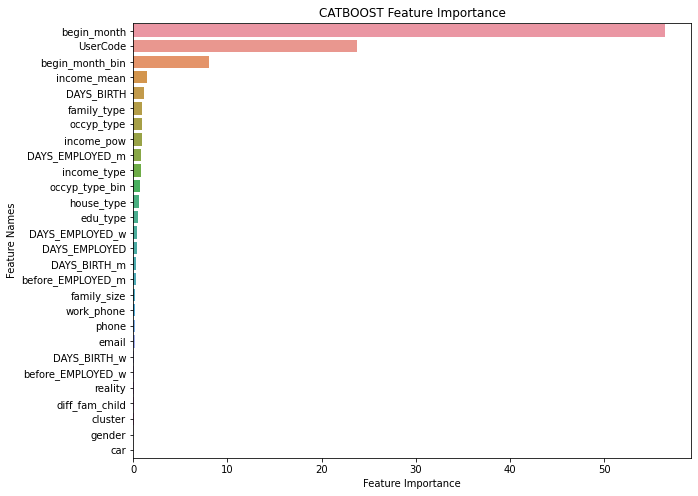

In [131]:
plot_feature_importance(grid_search_cat.best_estimator_.feature_importances_,x_test.columns,'CATBOOST')

### GridSearchCV & LGBM Classifier

In [132]:
# x_train['CustomerID_bin'] = x_train['CustomerID_bin'].astype('float64')
# x_test['CustomerID_bin'] = test_df['CustomerID_bin'].astype('float64')

In [133]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
import numpy as np

# LGBMClassifier 모델 객체 생성
model_lgbm = LGBMClassifier()

param_grid = {
    'max_depth': [8],
    'learning_rate': [0.05, 0.1],
    'reg_lambda': [5],
    'min_child_samples': [20, 30],
    'subsample': [0.5, 0.7, 1.0],
}

# GridSearchCV 객체 생성
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_lgbm.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_lgbm.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_lgbm_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_samples': 20, 'reg_lambda': 5, 'subsample': 0.5}
Log Loss: 0.500923


In [134]:
# 결과분석
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_test)
pred_y_lgbm = grid_search_lgbm.best_estimator_.predict(x_test)

In [135]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_lgbm_proba)
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.557781


In [136]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_lgbm))

              precision    recall  f1-score   support

           0       0.85      0.26      0.40      1898
           1       0.70      0.97      0.82      3394

    accuracy                           0.72      5292
   macro avg       0.77      0.62      0.61      5292
weighted avg       0.75      0.72      0.66      5292



In [137]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_lgbm, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.616088


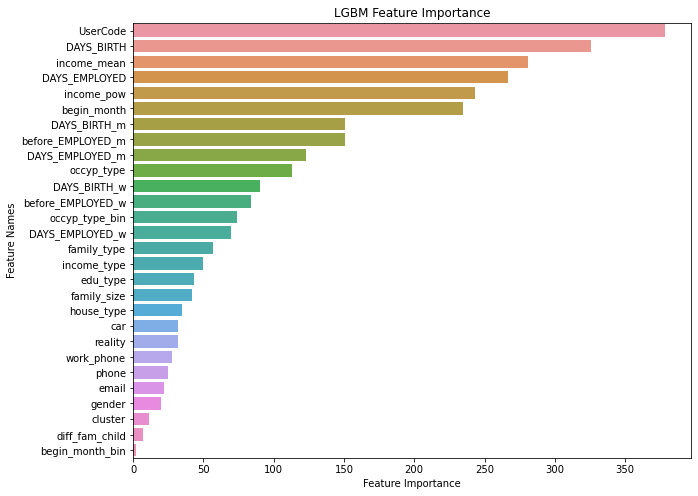

In [138]:
plot_feature_importance(grid_search_lgbm.best_estimator_.feature_importances_,x_test.columns,'LGBM')

### GridSearch & RandomForest

In [139]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 객체 생성
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
}

# GridSearchCV 객체 생성
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_rf.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_rf.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_rf_proba = grid_search_rf.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_rf_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Log Loss: 0.328228


In [140]:
# 결과분석
pred_y_rf_proba = grid_search_rf.predict_proba(x_test)
pred_y_rf = grid_search_rf.best_estimator_.predict(x_test)

In [141]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_rf_proba)
print(f'Test Log Loss +Score: {test_log_loss:.6f}')

Test Log Loss +Score: 0.526776


In [142]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_rf, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.679361


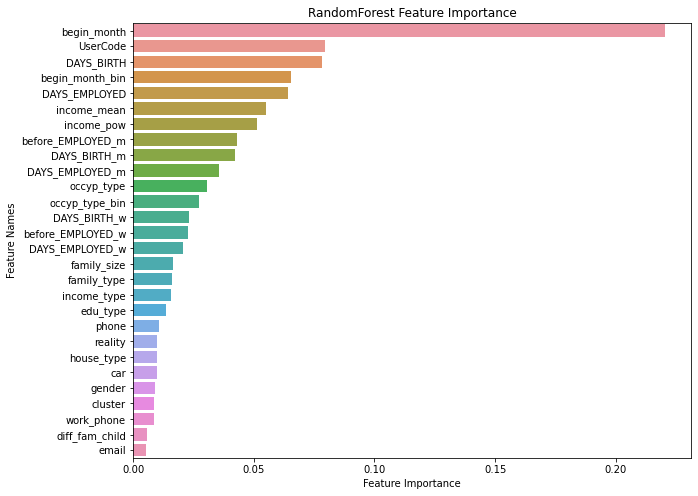

In [143]:
plot_feature_importance(grid_search_rf.best_estimator_.feature_importances_,x_test.columns,'RandomForest')